# Fraud Detection in Python 

## 1. Introduction and preparing your data

In this section, we'll learn about the typical challenges associated with fraud detection, and will learn how to resample our data in a smart way, to tackle problems with imbalanced data.

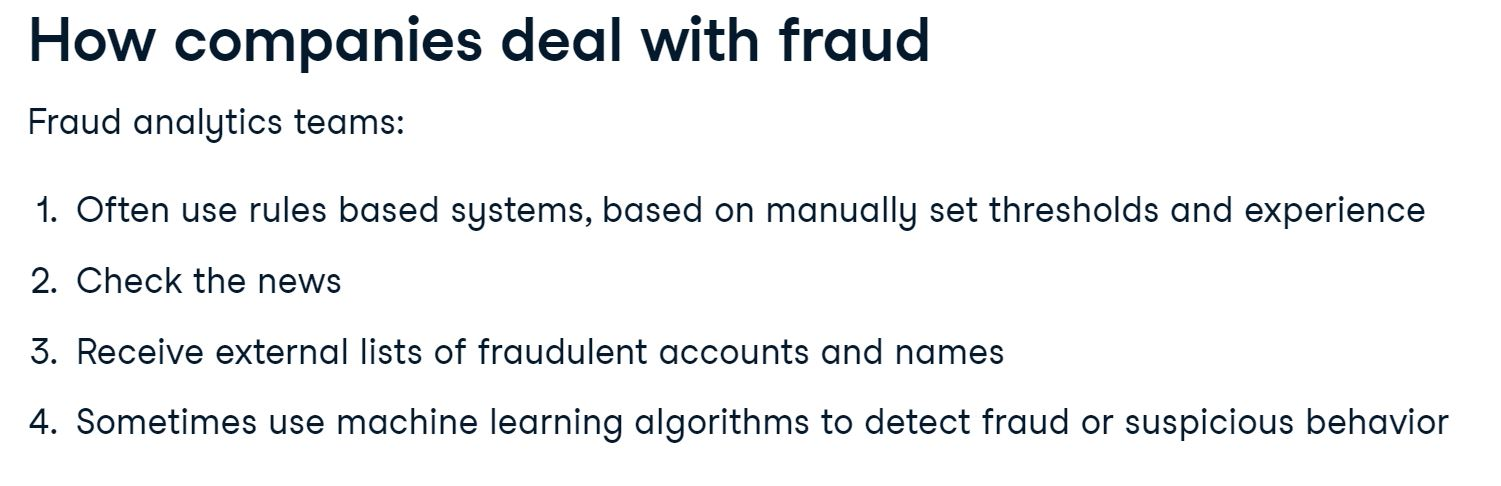

### 1.1 Dataset

The original [dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) contains transactions made by credit cards over two days in September 2013 by European cardholders. The dataset is highly unbalanced.

Machine Learning algorithms usually work best when the different classes contained in the dataset are more or less equally present. If there are few cases of fraud, then there's little data to learn how to identify them. This is known as class imbalance, and it's one of the main challenges of fraud detection.

Let's explore this dataset, and observe this class imbalance problem.

### Libraries & packages

In [1]:
%matplotlib inline

# data wrangling / viz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# stats / machine learning
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import silhouette_score

# text mining
#!pip install nltk
import nltk
from nltk.corpus import stopwords
import string
import gensim
from gensim import corpora
#!pip install pyLDAvis

import py

### 1.1.1 Checking the fraud to non-fraud ratio

In [2]:
df = pd.read_csv('data/creditcard.csv')
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [3]:
# Explore the features available in your dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

Class
0    284315
1       492
Name: count, dtype: int64


In [5]:
# Print the ratio of fraud cases
print(occ / len(df))

Class
0    0.998273
1    0.001727
Name: count, dtype: float64


As we can see, the proportion of fraudulent transactions (denoted by 1) is very low. We will learn how to deal with this in the next section.

### 1.1.2 Plotting our data

Let's look at the data and visualize the fraud to non-fraud ratio. It is always a good starting point in your fraud analysis, to look at your data first, before you make any changes to it. Moreover, when talking to your colleagues, a picture often makes it very clear that we're dealing with heavily imbalanced data. Let's create a plot to visualize the ratio fraud to non-fraud data points on the dataset.

In [9]:
def prep_data(df):
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(np.float64)
    y = df.iloc[:, 29]
    y=np.array(y).astype(np.float64)
    return X,y

In [10]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
	plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
	plt.legend()
	return plt.show()

In [11]:
# Create X and y from the prep_data function 
X_original, y_original = prep_data(df)

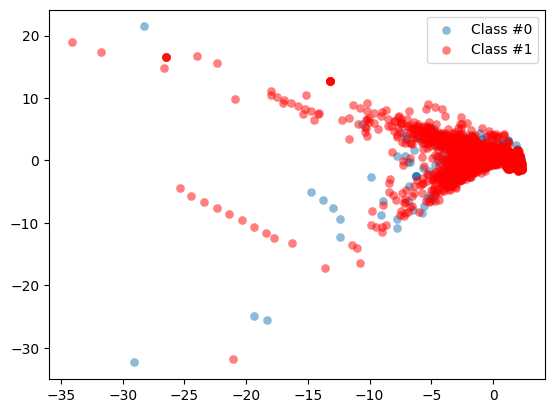

In [12]:
# Plot our data by running our plot data function on X and y
plot_data(X_original, y_original)

By visualizing our data you can immediately see how scattered our fraud cases are, and how few cases we have. A picture often makes the imbalance problem very clear. In the next sections we'll visually explore how to improve our fraud to non-fraud balance.

### 1.2 Increasing successful detections using data resampling

#### Undersampling

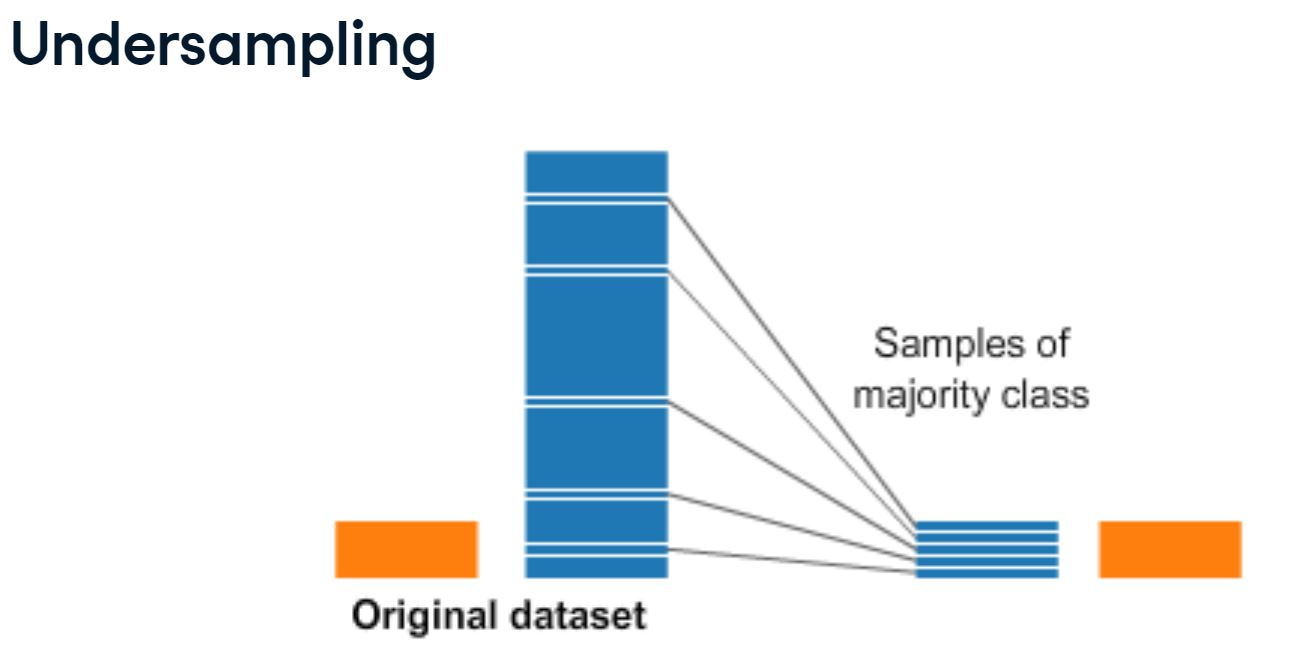

The most straightforward way to adjust the imbalance of your data, is to undersample the majority class, aka non-fraud cases, or oversample the minority class, aka the fraud cases. With undersampling, you take random draws from your non-fraud observations, to match the amount of fraud observations as seen on the picture.

#### Oversampling

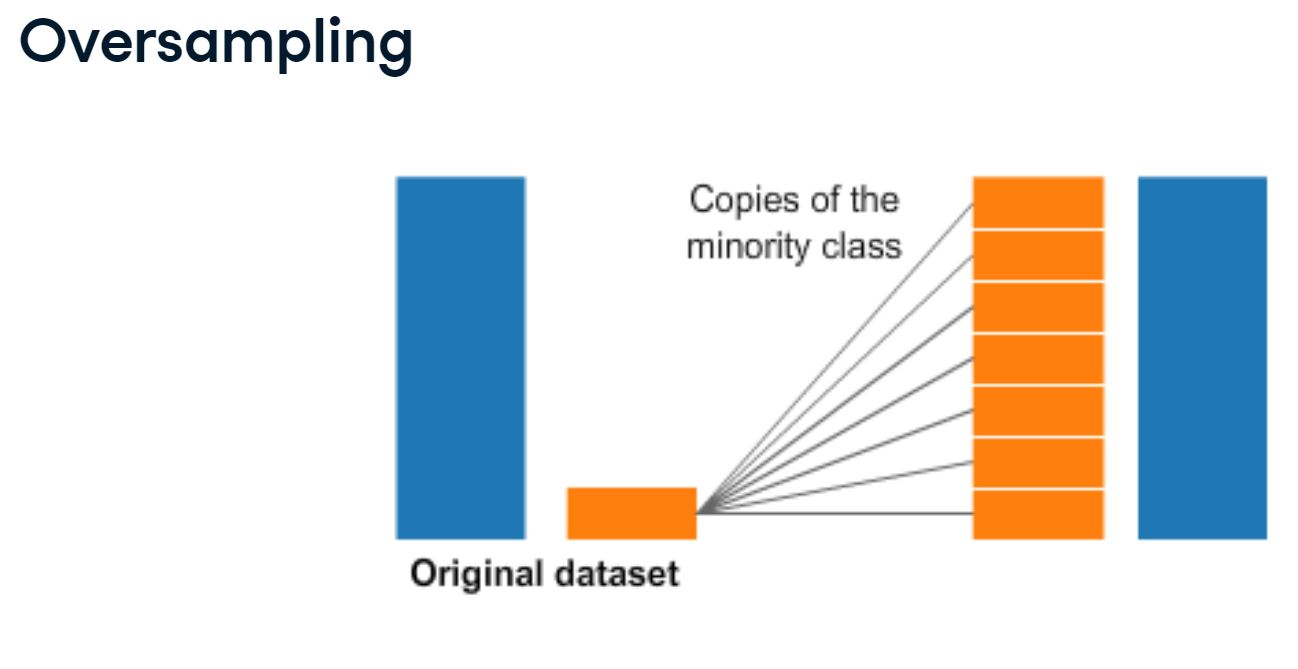


You can implement resampling methods using Python's imbalanced learn module. It is compatible with scikit-learn and allows you to implement these methods in just two lines of code. As you can see here, I import the package and take the Random Oversampler and assign it to method. I simply fit the method onto my original feature set X, and labels y, to obtained a resampled feature set X, and resampled y. I plot the datasets here side by side, such that you can see the effect of my resampling method. The darker blue color of the data points reflect that there are more identical data points now.

#### Synthetic Minority Oversampling Technique (SMOTE)

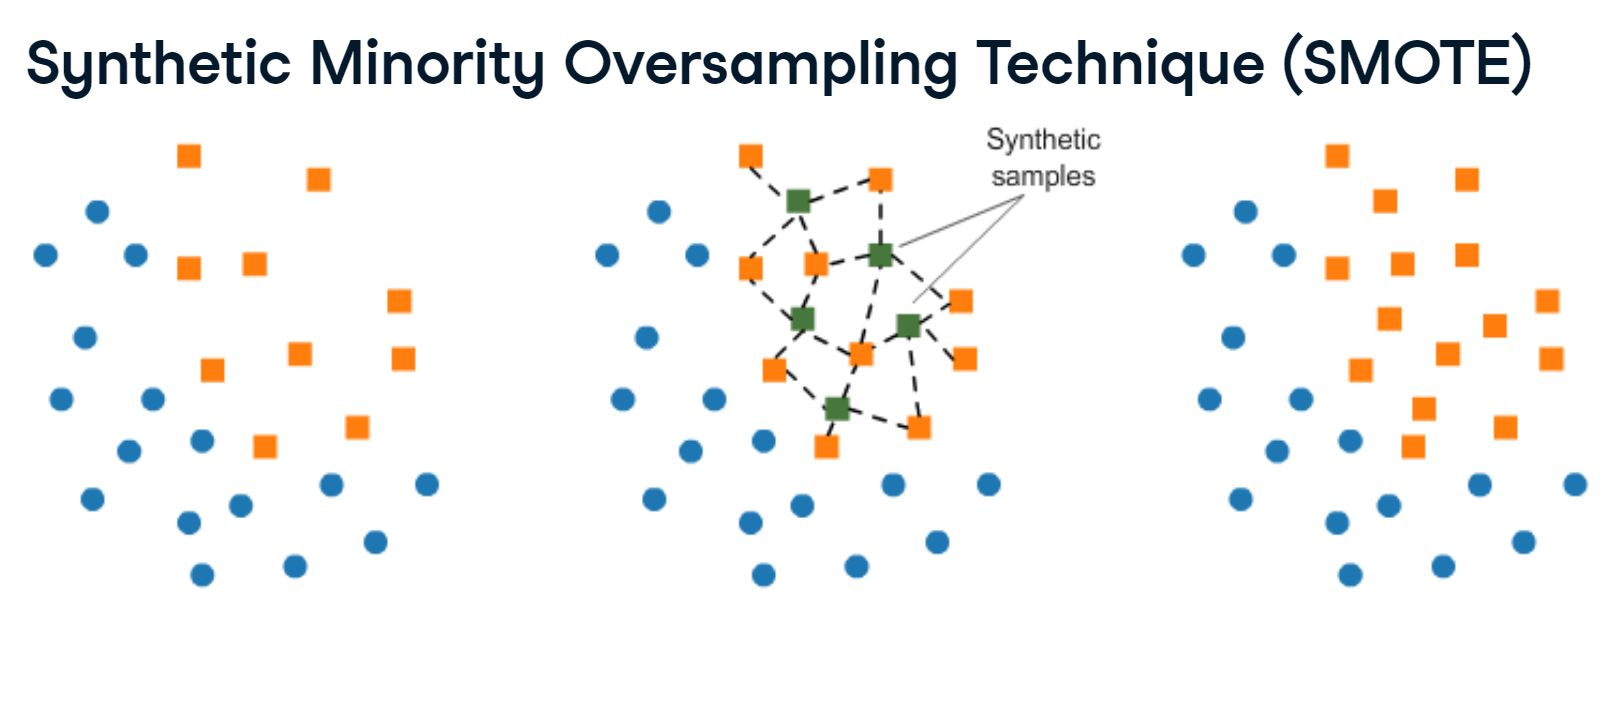

The Synthetic Minority Oversampling Technique, or SMOTE, is another way of adjusting the imbalance by oversampling your minority observations, aka your fraud cases. But with SMOTE, we're not just copying the minority class. Instead, as you see in this picture, SMOTE uses characteristics of nearest neighbors of fraud cases to create new synthetic fraud cases, and thereby avoids duplicating observations.

#### Which resampling method to use?

You might wonder which one of these methods is the best? Well, it depends very much on the situation. If you have very large amounts of data, and also many fraud cases, you might find it computationally easier to undersample, rather than to increase data even more. But in most cases, throwing away data is not desirable. When it comes to oversampling, SMOTE is more sophisticated as it does not duplicate data. But this only works well if your fraud cases are quite similar to each other. If fraud is spread out over your data and not very distinct, using nearest neighbors to create more fraud cases introduces a bit of noise in the data, as the nearest neighbors might not necessarily be fraud cases.

#### When to use resampling methods

One thing to keep in mind when using resampling methods, is to only resample on your training set. Your goal is to better train your model by giving it balanced amounts of data. Your goal is not to predict your synthetic samples. Always make sure your test data is free of duplicates or synthetic data, such that you can test your model on real data only. The way to do this, is to first split the data into a train and test set, as you can see here. I then resample the training set only. I fit my model into the resampled training data, and lastly, I obtain my performance metrics by looking at my original, not resampled, test data. These steps should look familiar to you.



### 1.2.1 Applying SMOTE

In the following example , we are going to re-balance our data using the `Synthetic Minority Over-sampling Technique (SMOTE)`. Unlike ROS, SMOTE does not create exact copies of observations, but creates new, synthetic, samples that are quite similar to the existing observations in the minority class. 

SMOTE is therefore slightly more sophisticated than just copying observations, so let's apply SMOTE to our credit card data.

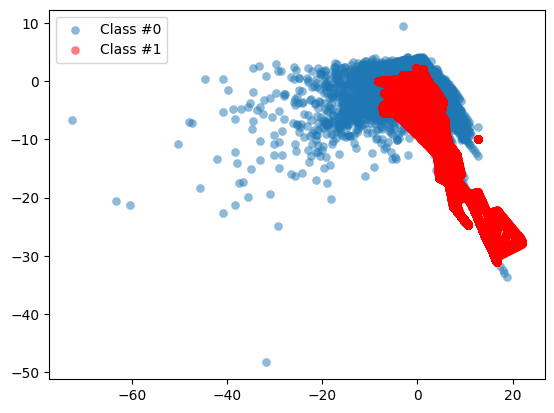

In [13]:
from imblearn.over_sampling import SMOTE

# Drop the Time column
df = df.drop('Time', axis=1)

# Run the prep_data function
X, y = prep_data(df)

# Define the resampling method
method = SMOTE()

# Create the resampled feature set
# apply SMOTE to the original X, y 
X_resampled, y_resampled = method.fit_resample(X, y)

# Plot the resampled data
plot_data(X_resampled, y_resampled)

As you can see, our minority class is now much more prominently visible in our data. To see the results of SMOTE even better, we'll compare it to the original data in the next section.

### 1.2.2 Compare SMOTE to original data

In the last exercise, you saw that using SMOTE suddenly gives us more observations of the minority class. Let's compare those results to our original data, to get a good feeling for what has actually happened. Let's have a look at the value counts again of our old and new data, and let's plot the two scatter plots of the data side by side

In [14]:
def compare_plot(X_original,y_original,X_resampled,y_resampled, method):
    # Start a plot figure
    f, (ax1, ax2) = plt.subplots(1, 2)
    
    # sub-plot number 1, this is our normal data
    c0 = ax1.scatter(X_original[y_original == 0, 0], X_original[y_original == 0, 1], label="Class #0",alpha=0.5)
    c1 = ax1.scatter(X_original[y_original == 1, 0], X_original[y_original == 1, 1], label="Class #1",alpha=0.5, c='r')
    ax1.set_title('Original set')
    
    # sub-plot number 2, this is our oversampled data
    ax2.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=.5)
    ax2.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=.5,c='r')
    ax2.set_title(method)
    # some settings and ready to go
    plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
                  ncol=2, labelspacing=0.)
    #plt.tight_layout(pad=3)
    return plt.show()

/tmp/ipykernel_3288/1066387134.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(pd.Series(y)))
/tmp/ipykernel_3288/1066387134.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(pd.Series(y_resampled)))


0.0    284315
1.0       492
Name: count, dtype: int64
0.0    284315
1.0    284315
Name: count, dtype: int64


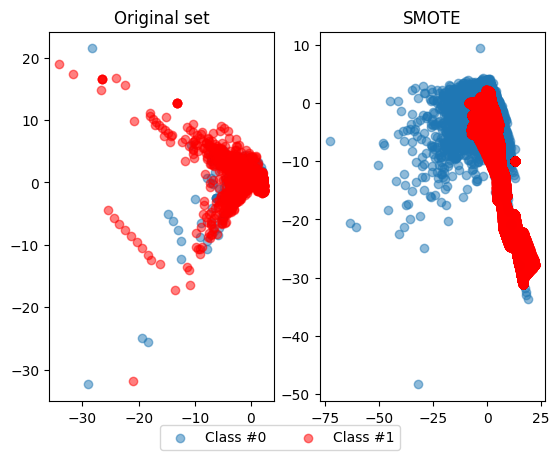

In [15]:
# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

# Run compare_plot
compare_plot(X_original, y_original, X_resampled, y_resampled, method='SMOTE')

It should by now be clear that our SMOTE has balanced our data completely, and that the minority class is now equal in size to the majority class. Visualizing the data shows the effect on your data very clearly. In the next section, we'll demonstrate that there are multiple ways to implement SMOTE and that each method will have a slightly different effect.

### 1.3 Fraud detection algorithms in action

As a data scientist, you'll often be asked to defend your method of choice, so it is important to understand the intricacies of both methods.


#### Traditional fraud detection with rules based systems

Traditionally, fraud analysts use rules based systems for detection of fraud. For example in the case of credit cards, the analysts might create rules based on a location and block transactions from risky zip codes. They might also create rules to block transactions from cards used too frequently, for example in the last 30 minutes. Some of these rules can be highly efficient at catching fraud, whilst others are not and results in false alarm too often.

#### Drawbacks of using rules based systems

A major limitation of rules based systems, is that the thresholds per rule are fixed, and those do not adapt as fraudulent behavior changes over time. Also, it's very difficult to determine what the right threshold should be. Second, with a rule, you'll get a yes or no outcome, unlike with machine learning where you can get a probability value. With probabilities, you can much better fine tune the outcomes to the amount of cases you want to inspect as a fraud team. Effectively, with a machine learning model, you can easily determine how many false positives and false negatives are acceptable, and with rules that's much harder. Rules based system also cannot capture the interaction of features like machine learning models can. So, for example, suppose the size of a transaction only matters in combination with the frequency, for determining fraudulent transactions. A rules based systems cannot really deal with that.

#### Why use machine learning for fraud detection?

Machine learning models don't have these limitations. They will adapt to new data, and therefore can capture new fraudulent behavior. You are able to capture interactions between features, and can work with probabilities rather than yes/no answers. Machine learning models therefore typically have a better performance in fraud detection. However, machine learning models are not always the holy grail. Some simple rules might prove to be quite capable of catching fraud. You therefore want to explore whether you can combine models with rules, to improve overall performance.



### 1.3.1 Exploring the traditional way to catch fraud

In this example we are going to try finding fraud cases in our credit card dataset the "old way". First we'll define threshold values using common statistics, to split `fraud` and `non-fraud`. Then, use those thresholds on your features to detect fraud. This is common practice within fraud analytics teams. Statistical thresholds are often determined by looking at the mean values of observations. 

In [16]:
# Get the mean for each group
df.groupby('Class').mean()

# Implement a rule for stating which cases are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df.V1 < -3, df.V3 < -5), 1, 0)

# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud       0     1
Actual Fraud               
0              283089  1226
1                 322   170


Not bad, with this rule, we detect 170 out of 492 fraud cases (34.5%), but can't detect the other 322, and get 1,226 false positives (that is we flagged the transaction as fraud but it wasn't). In the next section, we'll see how this measures up to a machine learning model.

### 1.3.2 Using ML classification to catch fraud

In this exercise we'll see what happens when we use a simple machine learning model on our credit card data instead. Let's implement a Logistic Regression model. 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.85      0.60      0.70       147

    accuracy                           1.00     85443
   macro avg       0.93      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85281    15]
 [   59    88]]


/home/stephen137/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We are getting far fewer false positives (15 compared with 1,226), so that's an improvement. Also, we're catching a higher percentage (59.9%) of fraud cases (88 out of 147) compared with 34.5% that is also better than before. 

Do you understand why we have fewer observations to look at in the confusion matrix? Remember we are using only our test data to calculate the model results on. We're comparing the crosstab on the full dataset from the last exercise, with a confusion matrix of only 30% of the total dataset, so that's where that difference comes from. 

In the next section, we'll dive deeper into understanding these model performance metrics. Let's now explore whether we can improve the prediction results even further with resampling methods.

### 1.3.3 Logistic regression combined with SMOTE

In this example, we're going to take the Logistic Regression model from the previous exercise, and combine that with a SMOTE resampling method. We'll show how to do that efficiently by using a pipeline that combines the resampling method with the model in one go. First, we need to define the pipeline that we're going to use.

In [18]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE()
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

### 1.4 Using a pipeline

Now that we have our pipeline defined, aka combining a logistic regression with a SMOTE method, let's run it on the data. We can treat the pipeline as if it were a single machine learning model.

In [19]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     85296
         1.0       0.09      0.90      0.16       147

    accuracy                           0.98     85443
   macro avg       0.55      0.94      0.58     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83970  1326]
 [   15   132]]


/home/stephen137/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As we can see, the SMOTE slightly improves our results. We now manage to find 132 out of 147 cases of fraud (89.8%), but we have a slightly higher number of false positives, 1,326 cases. 

Remember, resampling does not necessarily lead to better results. When the fraud cases are very spread and scattered over the data, using SMOTE can introduce a bit of bias. Nearest neighbors aren't necessarily also fraud cases, so the synthetic samples might 'confuse' the model slightly. 

In the next sections, we'll learn how to also adjust our machine learning models to better detect the minority fraud cases.

## 2 Fraud detection using labeled data

In this section we will learn how to flag fraudulent transactions with `supervised` learning. You will use classifiers, adjust them, and compare them to find the most efficient fraud detection model.

### 2.1 Review of classification methods

#### What is classification?

Classification is the problem of identifying to which class a new observation belongs, on the basis of a training set of data containing observations whose class is known. Classes are sometimes called targets, labels or categories. For example, spam detection in email service providers can be identified as a classification problem. This is a binary classification since there are only two classes as spam and not spam. Fraud detection is a classification problem, as we try to predict whether observations are fraudulent, yes or no. Lastly, assigning a diagnosis to a patient based on characteristics of a tumor, malignant or benign, is a classification problem. Classification problems normally have a categorical output like a yes or no, 1 or 0, True or False. In the case of fraud detection, the negative non-fraud class is the majority class, whereas the fraud cases are the minority class.

#### Classification methods commonly used for fraud detection

`Neural networks`\
They are capable of fitting highly non-linear models to our data. They tend to be slightly more complex to implement than most of the other classifiers.

`Decision trees`

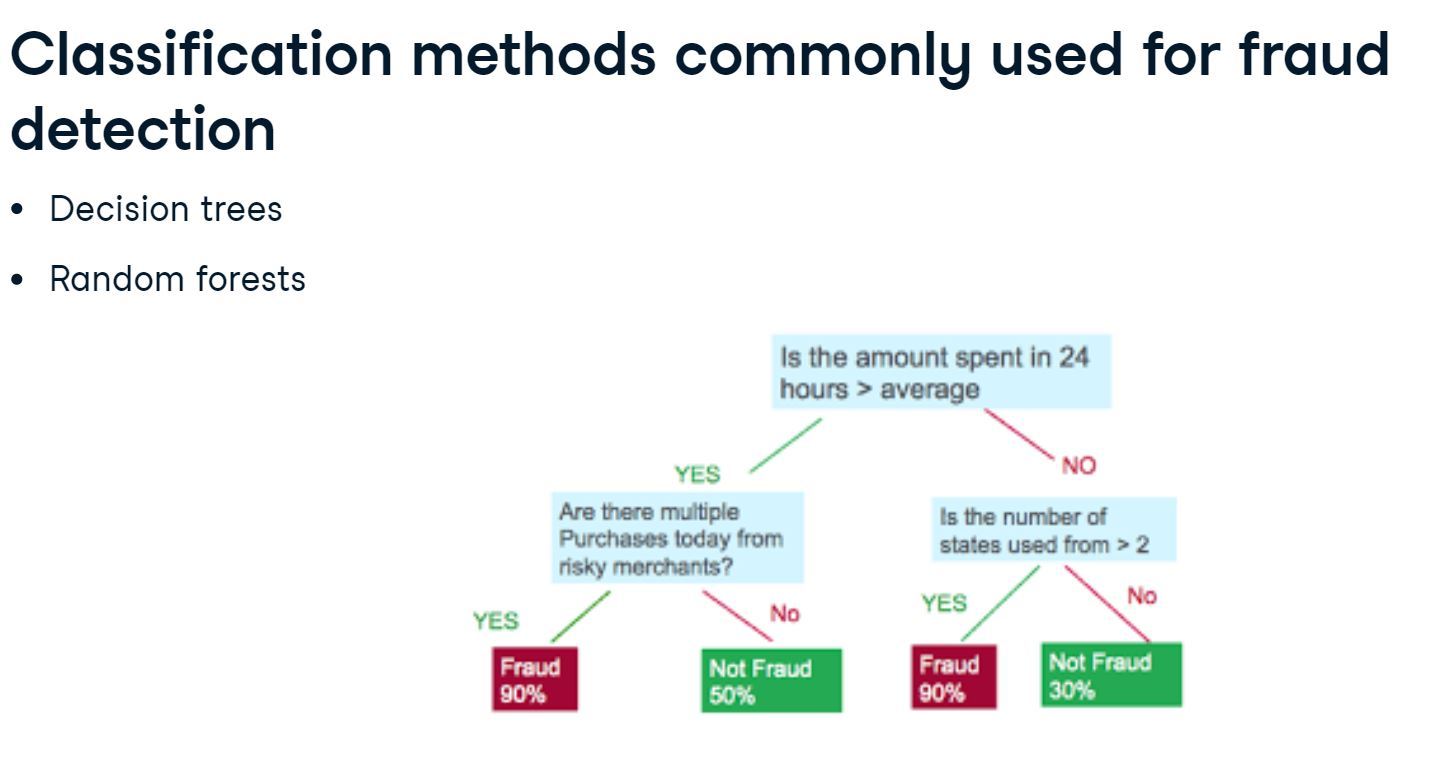

As you can see in the picture, decision trees give very transparent results, that are easily interpreted by fraud analysts. Nonetheless, they are prone to **overfit** to your data.

`Random Forest`

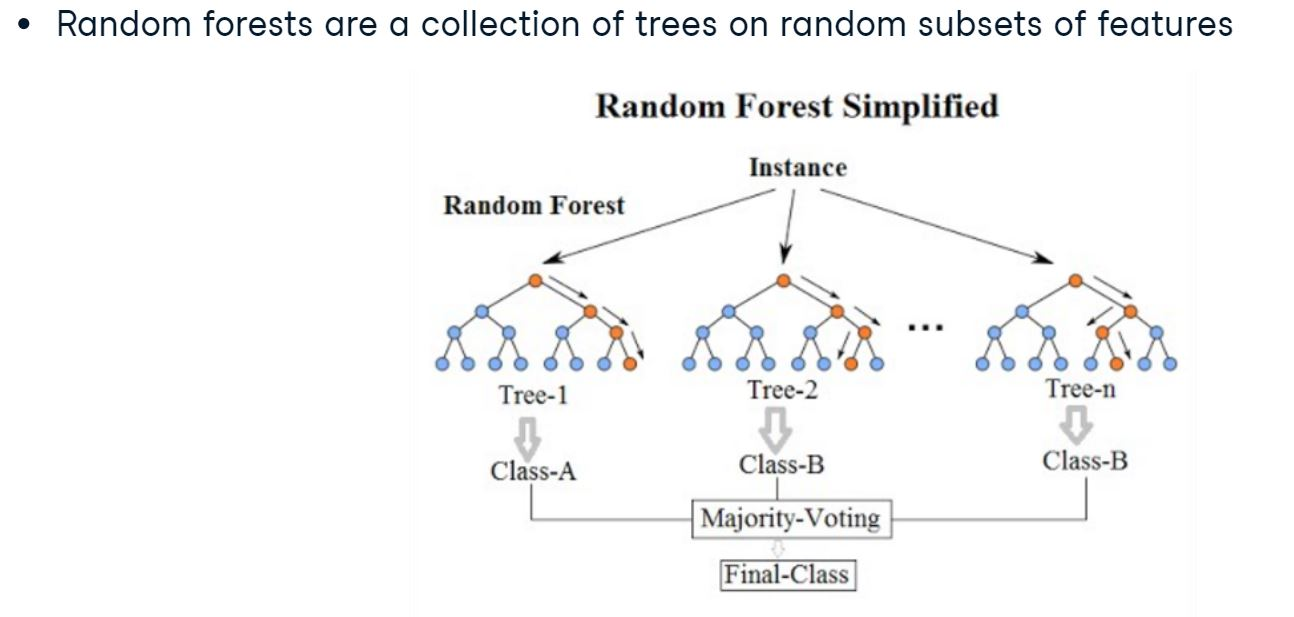

Random forests are a more robust option to use, as they construct a multitude of decision trees when training your model and outputting the class that is the mode or mean predicted class of all the individual trees. To be more precise, a random forest consists of a collection of trees on a random subset of features. Final predictions are the combined results of those trees. Random forests can handle complex data and are not prone to overfit. They are interpretable by looking at feature importance, and can be adjusted to work well on highly imbalanced data. The only drawback is that they can be computationally quite heavy to run. Nonetheless, random forests are very popular for fraud detection.

### 2.1.1 Natural hit rate

First let's explore how prevalent fraud is in the dataset, to understand what the "natural accuracy" is, if we were to predict everything as non-fraud. It is important to understand which level of "accuracy" you need to "beat" in order to get a better prediction than by doing nothing. In the following exercises, we'll create a random forest classifier for fraud detection. That will serve as the "baseline" model that we're going to try to improve.

In [20]:
# Count the total number of observations from the length of y
total_obs = len(y)

# Count the total number of non-fraudulent observations 
non_fraud = [obs for obs in y if obs == 0]
count_non_fraud = non_fraud.count(0)

# Calculate the percentage of non fraud observations in the dataset
percentage = (float(count_non_fraud)/float(total_obs)) * 100

# Print the percentage: this is our "natural accuracy" by doing nothing
print(percentage)

99.82725143693798


This tells us that by doing nothing, we would be correct in 99.8% of the cases. So now you understand, that if we get an accuracy of less than this number, our model does not actually add any value in predicting how many cases are correct. Let's see how a random forest does in predicting fraud in our data.

### 2.1.2 Random Forest Classifier

Let's now create a random forest classifier for fraud detection. Hopefully we can do better than the baseline accuracy we just calculated, which was roughly 99.8% This model will serve as the "baseline" model that you're going to try to improve.

In [21]:
# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the model as the random forest
model = RandomForestClassifier(random_state=5)

Let's see how our Random Forest model performs without doing anything special to it :

In [22]:
# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

In [23]:
# Print the accuracy performance metric
print(accuracy_score(y_test, predicted))

0.9995201479348805


The Random Forest model achieves an accuracy score of 99.95%.

### 2.2 Performance Evaluation

#### Accuracy isn't everything

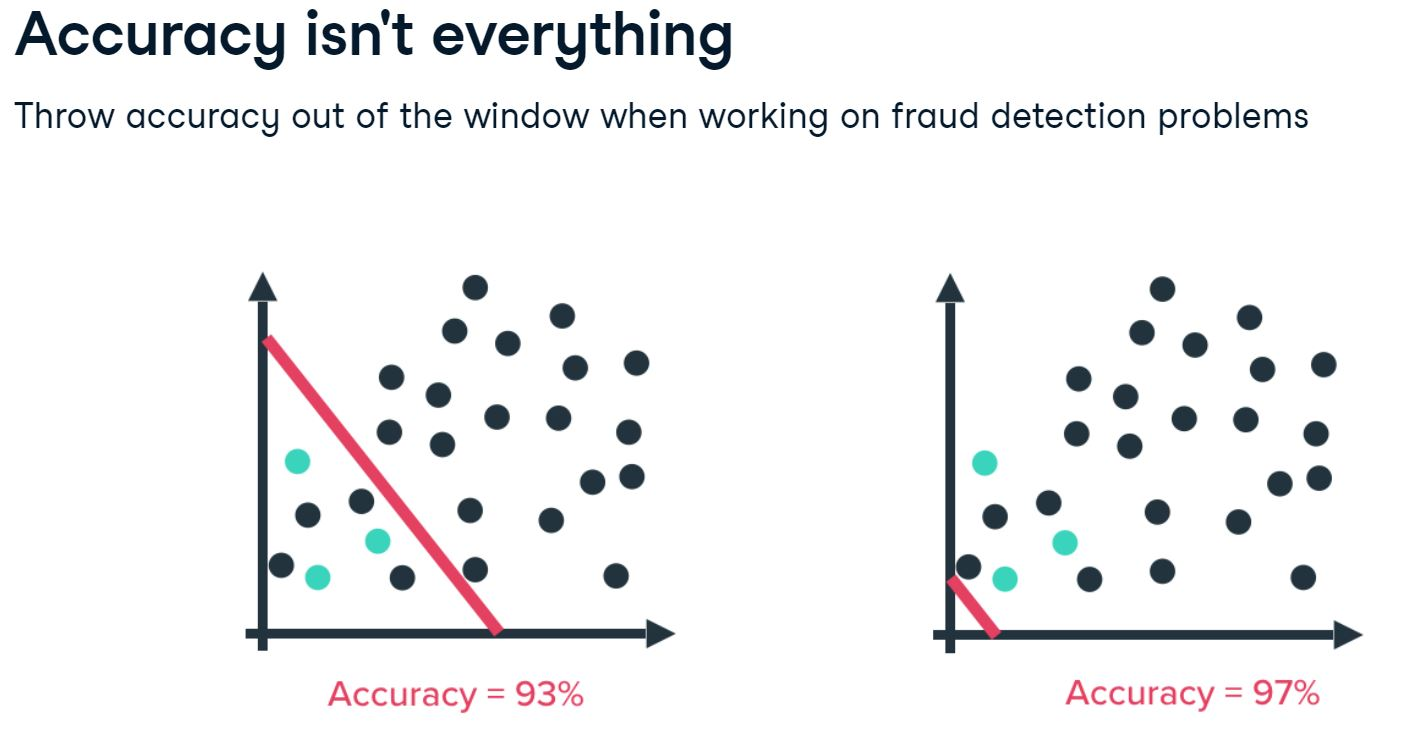

As you can see on these two images, accuracy is not a reliable performance metric when working with highly imbalanced data, as is the case in fraud detection. By doing nothing, aka predicting everything is the majority class, in the picture on the right, you often obtain a higher accuracy than by actually trying to build a predictive model, in the picture on the left. So let's discuss other performance metrics that are actually informative and reliable.

#### False positives, false negatives, and actual fraud

First of all, we need to understand the concepts of false positives, false negatives etc really well for fraud detection. Let's refresh that for a moment. 

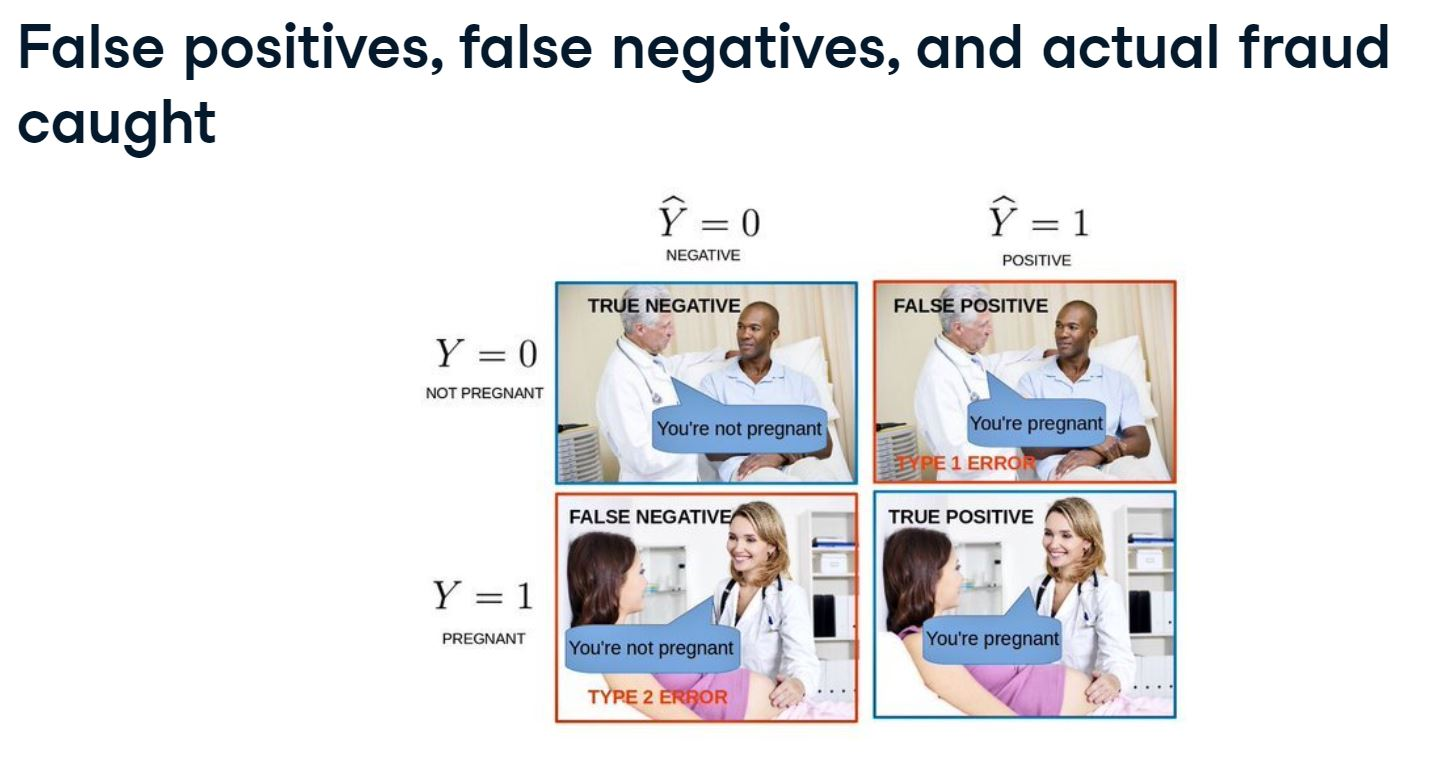

The true positives and true negatives are the cases you are predicting correct, in our case, fraud and non-fraud. The images on the top left and bottom right are true negatives and true positives, respectively. The false negatives as seen in the bottom left, is predicting the person is not pregnant, but actually is. So these are the cases of fraud you are not catching with your model. The false positives in the top right are the cases that we predict to be pregnant, but aren't actually. These are "false alarm" cases, and can result in a burden of work whilst there actually is nothing going on. 

Depending on the business case, one might care more about false negatives than false positives, or vice versa. A credit card company might want to catch as much fraud as possible and reduce false negatives, as fraudulent transactions can be incredibly costly, whereas a false alarm just means someone's transaction is blocked. 

On the other hand, an insurance company can not handle many false alarms, as it means getting a team of investigators involved for each positive prediction.

#### Precision-recall tradeoff

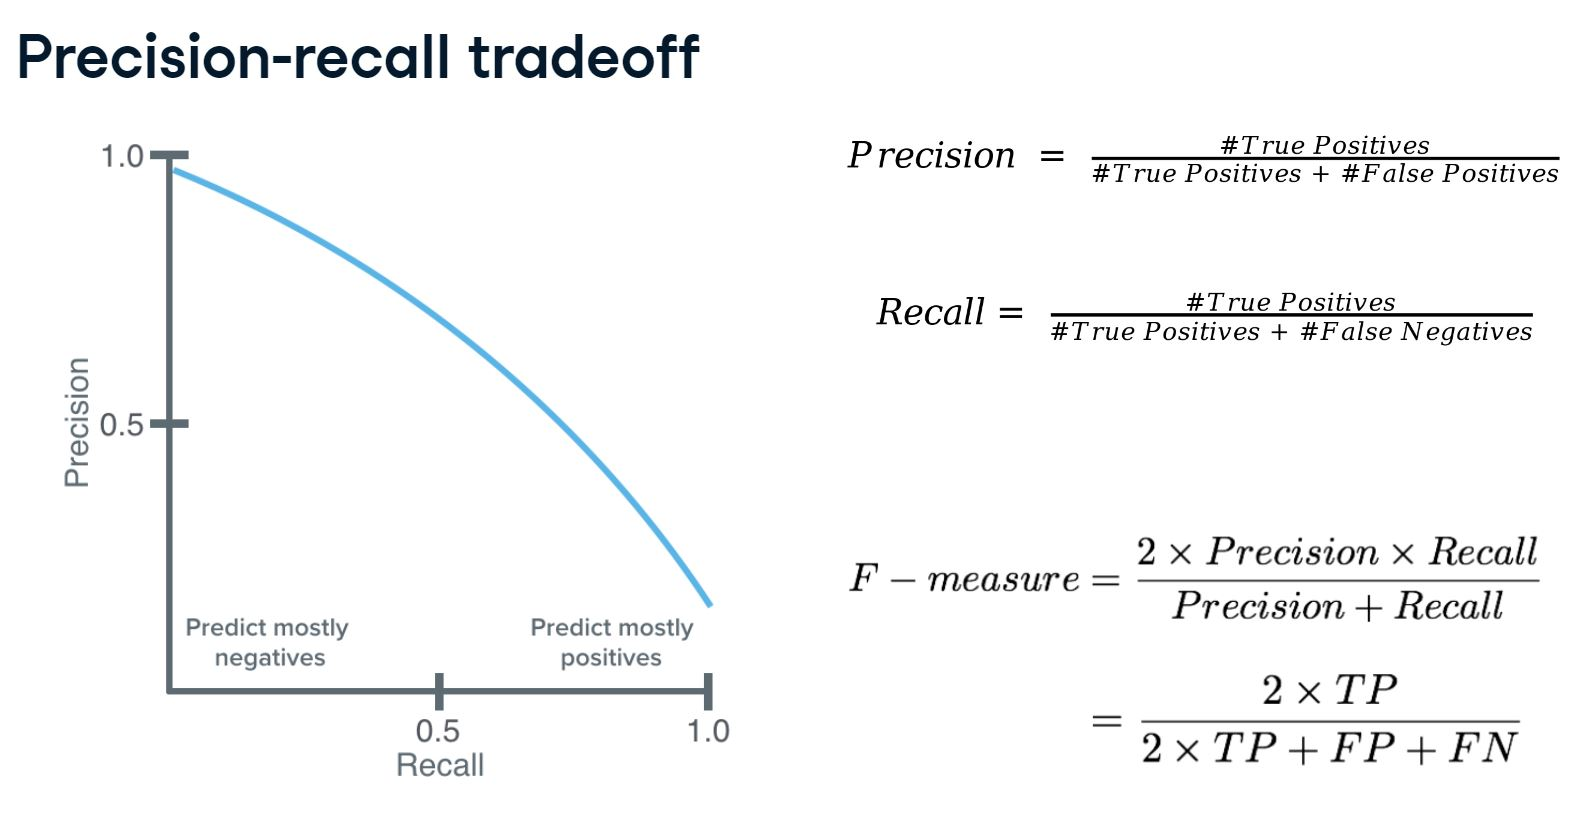

The credit card company, therefore, wants to optimize for recall, whereas the insurance company cares more for precision. 

`Precision` is the fraction of actual fraud cases out of all predicted fraud cases, ie, the true positives relative to the true positives plus false positives

`Recall`  is the fraction of predicted fraud cases out of all the actual fraud cases, ie, the true positives relative to the true positives plus false negatives. Typically, precision and recall are inversely related. 

Basically as precision increases, recall falls and vice versa. You can plot the tradeoff between the two in the precision-recall curve, as seen here on the left. 

The `F-score` weighs both precision and recall into one measure, so if you want to use a performance metric that takes into account a balance between precision and recall, F-score is the one to use.


#### Obtaining performance metrics

Obtaining precision and recall from scikit-learn is relatively straightforward. 

    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import average_precision_score

    average precision = average_precision_score(y_test, predicted)

The average precision is calculated with the `average_precision_score`, which you need to run on the actual labels y_test and your predictions. The curve is obtained in a similar way, which you can then plot to look at the trade-off between the two.

#### Precision-recall Curve

    precision, recall, _ = precision_recall_curve(y_test, predicted)

This returns the following graph.

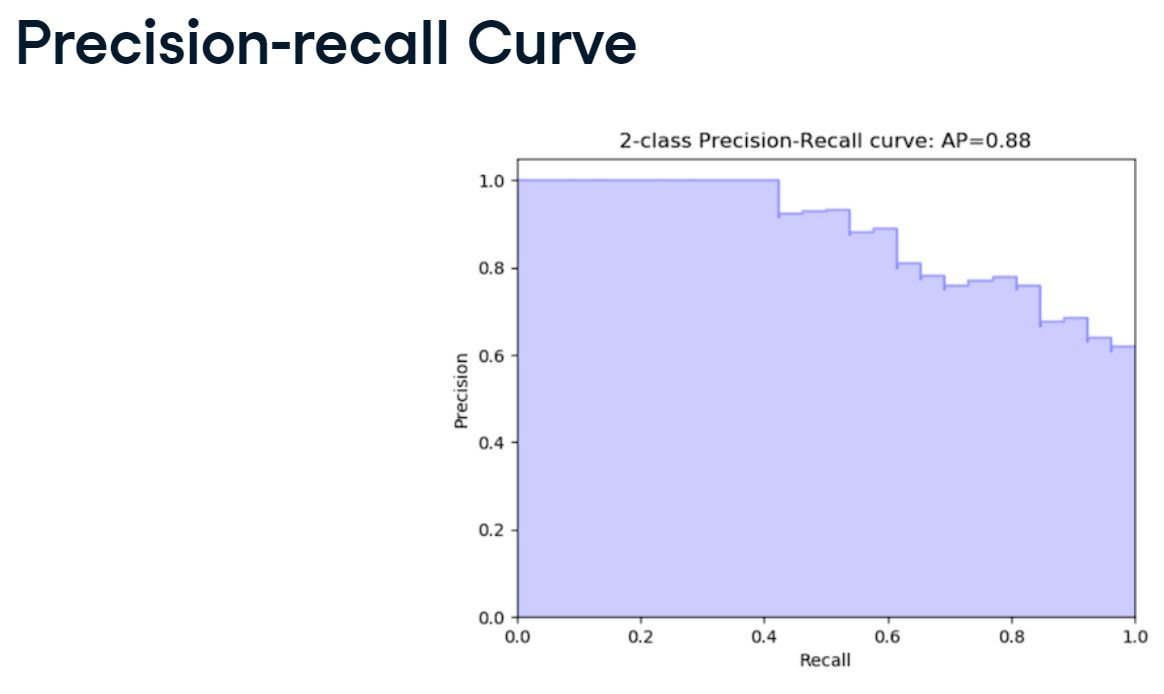


#### ROC curve to compare algorithms

Another useful tool in the performance toolbox is the ROC curve. ROC stands for receiver operating characteristic curve, and is created by plotting the true positive rate against the false positive rate at various threshold settings. The ROC curve is very useful for comparing performance of different algorithms for your fraud detection problem. The "area under the ROC curve"-metric is easily obtained by getting the model probabilities like this:

    probs = model.predict_proba(X_test)
    
    
and then comparing those with the actual labels.

    print(metrics.roc_auc_score(y_test, probs[:,1]))

#### Confusion matrix and classification report

The confusion matrix and classification report are an absolute must have for fraud detection performance. You can obtain these from the scikit-learn metrics package. 

    from sklearn.metrics import classification_report, confusion_matrix
    predicted = model.predict(X_test)

    print(classification_report(y_test,predicted))

You need the model predictions for these, so not the probabilities. The classification report gives you precision, recall, and F1-score across the different labels. The confusion matrix plots the false negatives, false positives, etc for you.

    print(confusion_matrix(y_test, predicted))

### 2.2.1 Performance metrics for the RF model

In [24]:
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9406216622833715
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.94      0.77      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85289     7]
 [   34   113]]


We have now obtained more meaningful performance metrics that tell us how well the model performs, given the highly imbalanced data that we're working with. The model predicts 120 cases of fraud, out of which 113 are actual fraud. We have only 7 false positives. This is really good, and as a result we have a very high precision score. We however don't catch 34 cases of actual fraud. Recall is therefore not as good as precision. Let's try to improve that.

### 2.2.2 Plotting the Precision Recall Curve

We can also plot a Precision-Recall curve, to investigate the trade-off between the two in our model. In this curve Precision and Recall are inversely related; as Precision increases, Recall falls and vice-versa. A balance between these two needs to be achieved in our model, otherwise we might end up with many false positives, or not enough actual fraud cases caught. To achieve this and to compare performance, the precision-recall curves come in handy.

In [25]:
from sklearn.metrics import average_precision_score

# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

In [26]:
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

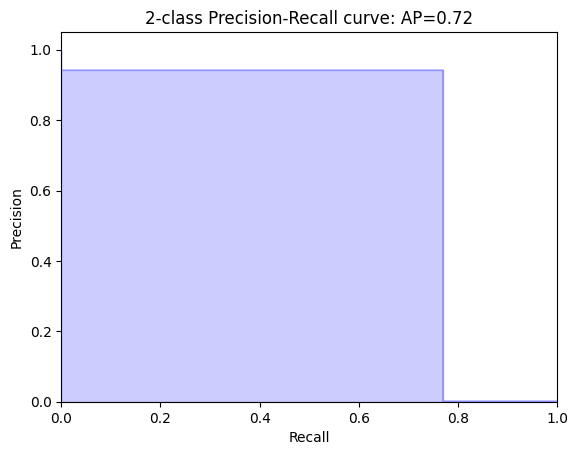

In [27]:
from sklearn.metrics import precision_recall_curve

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

### 2.3 Adjusting your algorithm weights

#### Balanced weights

When training a model for fraud detection, you want to try different options and setting to get the best recall-precision tradeoff possible. In scikit-learn there are two simple options to tweak your model for heavily imbalanced fraud data. 

There is the `balanced mode`, and `balanced_subsample` mode, that you can assign to the weight argument when defining the model. 

    model = RandomForestClassifier(class_weight='balanced')
    model = RandomForestClassifier(class_weight='balanced_subsample')

The balanced mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data. The balanced_subsample mode is the same as the balanced option, except that weights are calculated again at each iteration of growing a tree in the random forest. This latter option is therefore only applicable for the random forest model. The balanced option is however also available for many other classifiers, for example the logistic regression has the option, as well as the SVM model.

####  Hyperparameter tuning for fraud detection

The weight option also takes a manual input. This allows you to adjust weights not based on the value counts relative to sample, but to whatever ratio you like. So if you just want to upsample your minority class slightly, then this is a good option. All the classifiers that have the weight option available should have this manual setting also. Moreover, the random forest takes many other options you can use to optimize the model; you call this hyperparameter tuning. 

    model = RandomForestClassifier(class_weight={0:1, 1:4}, random_state=1)
    model = LogisticRegression(class_weight={0:1, 1:4}, random_state=1)

You can, for example, change the shape and size of the trees in the random forest by adjusting leaf size and tree depth. One of the most important settings are the number of trees in the forest, called number of `estimators`, and the number of `features` considered for splitting at each leaf node, indicated by `max_features`. Moreover, you can change the way the data is split at each node, as the default is to split on the `gini coefficient`. 

    model = RandomForestClassifier(n_estimators=10, criterion = 'gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', n_jobs=1, class_weight=None)

#### Using GridSearchCV

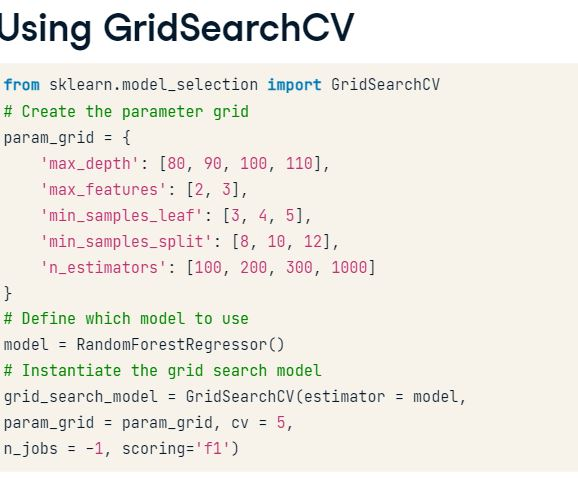

A smarter way of hyperparameter tuning your model is to use `GridSearchCV`. GridSearchCV evaluates all combinations of parameters we define in the parameter grid. This is an example of a parameter grid specifically for a random forest model. Let's define the machine learning model we'll use. And now, let's put it into a grid search. You pass in the model, the parameter grid, and we'll tell it how often to cross-validate. Most importantly, you need to define a scoring metric to evaluate the models on. This is incredibly important in fraud detection. The default option here would be accuracy, so if you don't define this, your models are ranked based on accuracy, which you already know is useless. You therefore need to pass the option precision, recall, or F1 here. Let's go with F1 for this example:

#### Finding the best model with GridSearchCV

Once you have fitted your GridSearchCV and model to the data, you can obtain the parameters belonging to the optimal model by using the best parameters function.

    grid_search_model.fit(X_train, y_train)
    grid_search_model.best_params_

Mind you, GridSearchCV is computationally very heavy to run. Depending on the size of your data, and number of parameters in the grid, this can take up to many hours to complete, so make sure to save the results. You can easily get the results for the best_estimator that gives the best_score; these results are all stored. The best score is the mean cross-validated score of the best_estimator, which of course also depends on the scoring option you gave earlier. As you chose F1 before, you'll get the best F1 sore here.

    grid_search.best_estimator_
    grid_search.best_score_

### 2.3.1 Model adjustments

In [ ]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5)

# Fit your training model to your training set
model.fit(X_train, y_train)

In [29]:
# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the roc_auc_score, the classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9407294501931329
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.95      0.76      0.84       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85290     6]
 [   36   111]]


We can see that the model results don't improve drastically. We now have 6 false positives (compared to 7), and now 36 instead of 34 false negatives, i.e. cases of fraud we are not catching.

### 2.3.2 Adjusting our Random Forest to fraud detection

In this example we will explore the options for the random forest classifier, by assigning weights and tweaking the shape of the decision trees in the forest. We'll define weights manually, to be able to off-set that imbalance slightly.

In [30]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In our case we have 492 fraud to 284,315 non-fraud cases, so by setting the weight ratio to 1:290, we get to `142,680 : 284315` (1/3 fraud to 2/3 non-fraud) ratio, which is good enough for training the model on.

In [31]:
def get_model_results(X_train, y_train, X_test, y_test, model):
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  probs = model.predict_proba(X_test)
  print (classification_report(y_test, predicted))
  print (confusion_matrix(y_test, predicted))

In [32]:
# Change the model options
model = RandomForestClassifier(bootstrap=True, class_weight={0:1, 1:290}, criterion='entropy',
			
			# Change depth of model
            max_depth=10,
		
			# Change the number of samples in leaf nodes
            min_samples_leaf=10, 

			# Change the number of trees to use
            n_estimators=20, n_jobs=-1, random_state=5)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.85      0.80      0.83       147

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85275    21]
 [   29   118]]


WE can see by smartly defining more options in the model, we can obtain better predictions. We have effectively reduced the number of false negatives (from 36 to 29), i.e. we are catching more cases of fraud, whilst keeping the number of false positives relatively low (21). In this example we manually changed the options of the model. There is a smarter way of doing it, by using GridSearchCV, which you'll see in the next section.

### 2.3.3 GridSearchCV to find optimal parameters

In this example we will tweak our model in a less "random" way, by leveraging GridSearchCV.

With GridSearchCV you can define which performance metric to score the options on. Since for fraud detection we are mostly interested in catching as many fraud cases as possible, we can optimize your model settings to get the best possible` Recall` score. If we also cared about reducing the number of false positives, we could optimize on F1-score, which provides a Precision-Recall trade-off.

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
# Define the parameter sets to test
# n_estimators = number of trees
# criterion refer to way trees split
param_grid = {'n_estimators': [1, 30], 'max_features': ['auto', 'log2'],  'max_depth': [4, 8], 'criterion': ['gini', 'entropy']
}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

/home/stephen137/mambaforge/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/stephen137/mambaforge/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/stephen137/mambaforge/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 30}

### 2.3.4 Model results using GridSearchCV

In [35]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:290}, criterion='entropy',
            n_estimators=30, max_features='log2',  min_samples_leaf=10, max_depth=8, n_jobs=-1, random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.83      0.82      0.82       147

    accuracy                           1.00     85443
   macro avg       0.92      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85272    24]
 [   27   120]]


We managed to improve our model even further. The number of false negatives has now been slightly reduced even further (from 29 to 27), which means we are catching more cases of fraud. However, we can see that the number of false positives actually went up (from 21 to 24). 

That is that Precision-Recall trade-off in action. 

To decide which final model is best, we need to take into account how bad it is not to catch fraudsters, versus how many false positives the fraud analytics team can deal with. Ultimately, this final decision should be made by you and the fraud team together.

### 2.4 Ensemble methods

####  What are ensemble methods: bagging versus stacking

Ensemble methods are techniques that create multiple machine learning models and then combine them to produce a final result. Ensemble methods usually produce more accurate predictions than a single model would. In fact, you've already worked with an ensemble method during the exercises. The random forest classifier is an ensemble of decision trees, and is described as a bootstrap aggregation, or bagging ensemble method. In a random forest, you train models on random subsamples of your data and aggregate the results by taking the average prediction of all of the trees.

#### Stacking ensemble methods

In this picture, you see a stacking ensemble method. In this case, multiple models are combined via a voting rule on the model outcome. The base level models are each trained based on the complete training set. So, unlike with the bagging method, you do not train your models on a subsample. In the stacking ensemble method, you can combine algorithms of different types. We'll practice this in the exercises.

####  Why use ensemble methods for fraud detection

The goal of any machine learning problem is to find a single model that will best predict the wanted outcome. Rather than making one model, and hoping this model is the best or most accurate predictor, you can make use of ensemble methods. Ensemble methods take a myriad of models into account, and average those models to produce one final model. This ensures that your predictions are robust and less likely to be the result of overfitting. Moreover, ensemble methods can improve overall performance of fraud detection, especially combining models with different recall and precision scores. They have therefore been a winning formula at many Kaggle competitions recently.

#### Voting classifier

he voting classifier available in scikit-learn is an easy way to implement an ensemble model. You start by importing the voting classifier, available from the ensemble methods package. Let's define three models to use in our ensemble model, in this case let's use a random forest, a logistic regression, and a Naive Bayes model. The next step is to combine these three into the ensemble model like this, and assign a rule to combine the model results. In this case, let's use a hard voting rule. That option uses the predicted class labels and takes the majority vote. The other option is soft voting. This rule takes the average probability by combining the predicted probabilities of the individual models. You can then simply use the ensemble_model as you would any other machine learning model, ie you can fit and use the model to predict classes. Last thing to mention is that you can also assign weights to the model predictions in the ensemble, which can be useful, for example, when you know one model outperforms the others significantly.

#### Reliable labels for fraud detection

In this section we have seen how to detect fraud when there are labels to train a model on. However, in real life, it is unlikely that you will have truly unbiased reliable labels for you model. For example, in credit card fraud you often will have reliable labels, in which case you want to use these methods you've just learned. However, in most other cases, you will need to rely on `unsupervised` learning techniques to detect fraud. You will learn how to do this in a later section.




### 2.4.1 Logistic Regression

We wil now combine three algorithms into one model with the `VotingClassifier`. This allows us to benefit from the different aspects from all models, and hopefully improve overall performance and detect more fraud. The first model, the `Logistic Regression`, has a slightly higher recall score than our optimal `Random Forest` model, but gives a lot more false positives. We'll also add a `Decision Tree` with balanced weights to it. 

In [36]:
df = pd.read_csv('data/creditcard.csv')
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [38]:
# Drop the Time column
df = df.drop('Time', axis=1)

In [41]:
def prep_data(df):
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(np.float64)
    y = df.iloc[:, 29]
    y=np.array(y).astype(np.float64)
    return X,y

In [42]:
# Create X and y from the prep_data function 
X_original, y_original = prep_data(df)

In [43]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.3, random_state=0)

In [44]:
X_train.shape

(199364, 28)

In [45]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [46]:
def get_model_results(X_train, y_train, X_test, y_test, model):
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  probs = model.predict_proba(X_test)
  print (classification_report(y_test, predicted))
  print (confusion_matrix(y_test, predicted))

# Define the Logistic Regression model with weights
model = LogisticRegression(class_weight={0:1, 1:290}, random_state=5)

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     85296
         1.0       0.11      0.89      0.20       147

    accuracy                           0.99     85443
   macro avg       0.56      0.94      0.60     85443
weighted avg       1.00      0.99      0.99     85443

[[84255  1041]
 [   16   131]]


/home/stephen137/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As you can see the Logistic Regression has quite different performance from the Random Forest. More false positives: 1,041 compared with 24, but also a better Recall, 0.89 compared to 0.82. It will therefore be a useful addition to the Random Forest in an ensemble model. Let's give that a try.

### 2.4.2 Voting Classifier

Let's now combine three machine learning models into one, to improve our Random Forest fraud detection model from before. We'll combine our usual Random Forest model, with the Logistic Regression from the previous exercise, with a simple Decision Tree.

In [47]:
# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1, 1:290}, criterion='gini', max_depth=8, max_features='log2',
            min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='soft') # predict_proba is not available when voting='hard'

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

/home/stephen137/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.84      0.80      0.82       147

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85273    23]
 [   30   117]]


We see that by combining the classifiers, we can take the best of multiple models. We've slightly decreased the cases of fraud we are catching from 120 to 117, and also reduced the number of false positives from 24 to 23. If you do care about catching as many fraud cases as you can, whilst keeping the false positives low, this is a pretty good trade-off. The Logistic Regression as a standalone was quite bad in terms of false positives, and the Random Forest was worse in terms of false negatives. By combining these together we managed to improve performance.

### 2.4.3 Adjust weights within the Voting Classifier

You've just seen that the Voting Classifier allows you to improve your fraud detection performance, by combining good aspects from multiple models. Now let's try to adjust the weights we give to these models. By increasing or decreasing weights you can play with how much emphasis you give to a particular model relative to the rest. This comes in handy when a certain model has overall better performance than the rest, but you still want to combine aspects of the others to further improve your results.

In [48]:
# Define the ensemble model, weighting 2nd classifier 4 to 1 with the rest
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1, 4, 1], flatten_transform=True)

# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

/home/stephen137/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.83      0.82      0.82       147

    accuracy                           1.00     85443
   macro avg       0.92      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85272    24]
 [   27   120]]


We have detected another 3 fraud cases and only conceded one additional false positive.

The weight option allows you to play with the individual models to get the best final mix for your fraud detection model. Now that we have finalized fraud detection with supervised learning, let's have a look at how fraud detection can be done when you don't have any labels to train on.

## 3. Fraud detection using unlabeled data

This section focuses on using unsupervised learning techniques to detect fraud. We will segment customers, use K-means clustering and other clustering algorithms to find suspicious occurrences in our data.

### 3.1 Normal versus abnormal behaviour

#### Fraud detection without labels

When you can't rely on fraud labels, you can use unsupervised learning to detect suspicious behavior. Suspicious behavior is behavior that is very uncommon in your data, for example, very large transactions, or many transactions in a short period of time. Such behavior often is an indication of fraud, but of course can also just be uncommon but not fraudulent. This type of fraud detection is challenging, because you don't have trustworthy labels to check your model results against. But, in fact, not having labels is the reality for many cases of fraud detection.

#### What is normal behavior?

In order to detect suspicious behavior, you need to understand your data very well. A good exploratory data analysis, including distribution plots, checking for outliers and correlations etc, is crucial. The fraud analysts can help you understand what are normal values for your data, and also what typifies fraudulent behavior. Moreover, you need to investigate whether your data is homogeneous, or whether different types of clients display very different behavior. What is normal for one does not mean it's normal for another. For example, older age groups might have much higher total amount of health insurance claims than younger people. Or, a millionaire might make much larger transactions on average than a student. If that is the case in your data, you need to find homogeneous subgroups of data that are similar, such that you can look for abnormal behavior within subgroups.

#### Customer segmentation: normal behavior within segments

So what can you think about when checking for segments in your data? First of all, you need to make sure all your data points are the same type. By type I mean: are they individuals, groups of people, companies, or governmental organizations? Then, think about whether the data points differ on, for example spending patterns, age, location, or frequency of transactions. Especially for credit card fraud, location can be a big indication for fraud. But this also goes for e-commerce sites; where is the IP address located, and where is the product ordered to ship? If they are far apart that might not be normal for most clients, unless they indicate otherwise. Last thing to keep in mind, is that you have to create a separate model on each segment, because you want to detect suspicious behavior within each segment. But that means that you have to think about how to aggregate the many model results back into one final list.

### 3.1.1 Exploring your data

In [62]:
df = pd.read_csv('data/banksim.csv')
df

Unnamed: 0 age gender           category    amount  fraud
0         171915   3      F  es_transportation   49.7100      0
1         426989   4      F          es_health   39.2900      0
2         310539   3      F  es_transportation   18.7600      0
3         215216   4      M  es_transportation   13.9500      0
4         569244   2      M  es_transportation   49.8700      0
...          ...  ..    ...                ...       ...    ...
7195      260136   5      M   es_hotelservices  236.1474      1
7196       56643   5      F   es_hotelservices  139.6000      1
7197      495817   1      F          es_travel  236.1474      1
7198      333170   1      M   es_hotelservices  236.1474      1
7199      579286   4      F          es_health  236.1474      1

[7200 rows x 6 columns]

In [63]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [64]:
# Get the dataframe shape
df.shape

(7200, 5)

In [65]:
# Display the first 5 rows
df.head()

age gender           category  amount  fraud
0   3      F  es_transportation   49.71      0
1   4      F          es_health   39.29      0
2   3      F  es_transportation   18.76      0
3   4      M  es_transportation   13.95      0
4   2      M  es_transportation   49.87      0

In [67]:
# Group by 'category' and calculate the mean of 'value'
df.groupby('category')['fraud'].mean()

category
es_barsandrestaurants    0.022472
es_contents              0.000000
es_fashion               0.020619
es_food                  0.000000
es_health                0.242798
es_home                  0.208333
es_hotelservices         0.548387
es_hyper                 0.125000
es_leisure               1.000000
es_otherservices         0.600000
es_sportsandtoys         0.657895
es_tech                  0.179487
es_transportation        0.000000
es_travel                0.944444
es_wellnessandbeauty     0.060606
Name: fraud, dtype: float64

You can see from the category averages that fraud is more prevalent in the leisure, travel and sports categories.

### 3.1.2 Customer segmentation

In this example we're going to check whether there are any obvious patterns for the clients in this data, thus whether we need to segment our data into groups, or whether the data is rather homogenous. We unfortunately don't have a lot client information available; we can't for example distinguish between the wealth levels of different clients. However, there is data on **age** available, so let's see whether there is any significant difference between behaviour of age groups.

In [69]:
# Group by age groups and get the mean
print(df.groupby('age')['fraud'].mean())

age
0    0.050000
1    0.026648
2    0.028718
3    0.023283
4    0.035966
5    0.023990
6    0.022293
U    0.000000
Name: fraud, dtype: float64


In [70]:
# Count the values of the observations in each age group
print(df['age'].value_counts())

age
2    2333
3    1718
4    1279
5     792
1     713
6     314
0      40
U      11
Name: count, dtype: int64


Based on these results it does not make sense to divide our data into age segments before running a fraud detection algorithm, because the largest groups are relatively similar in terms of both amount spent and fraud occurence. Although age group '0' has the highest proportion of fraud, only 40 cases in the entire dataset fall in this category, so it would not be feasible to split these out into a seperate group and run a model on that amount of observations. You have to keep in mind that you need to train the model seperately on each segment, so in this case it would not be possible.

### 3.1.3 Using statistics to define normal behavior

Let's investigate the average amounts spend in normal transactions versus fraud transactions. This gives you an idea of how fraudulent transactions differ structurally from normal transactions.

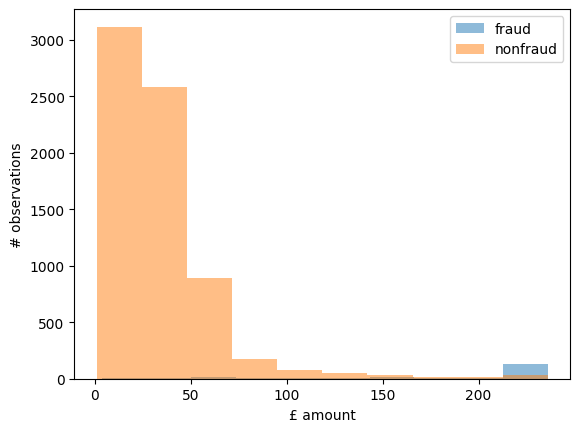

In [71]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = df.loc[df.fraud == 1] 
df_non_fraud = df.loc[df.fraud == 0]

# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.amount, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud')
plt.xlabel("£ amount")
plt.ylabel("# observations")
plt.legend()
plt.show()

As the number of fraud observations is much smaller, it is difficult to see the full distribution. Nonetheless, you can see that the fraudulent transactions tend to be on the larger side relative to normal obervations. This is good news, as it helps us later in detecting fraud from non-fraud. In the next chapter you're going to implement a clustering model to distinguish between normal and abnormal transactions, when the fraud labels are no longer available.

### 3.2 Clustering methods to detect fraud

#### Clustering: trying to detect patterns in data

The objective of any clustering model is to detect patterns in your data. More specifically, to group your data in distinct clusters, that is made up of data points that are very similar to each other, but distinct from the data points in the other clusters. We can use this for fraud detection to determine which data looks very similar to the data in the clusters, and which data you would have a hard time assigning to any cluster. You can flag such data as odd, or suspicious. 

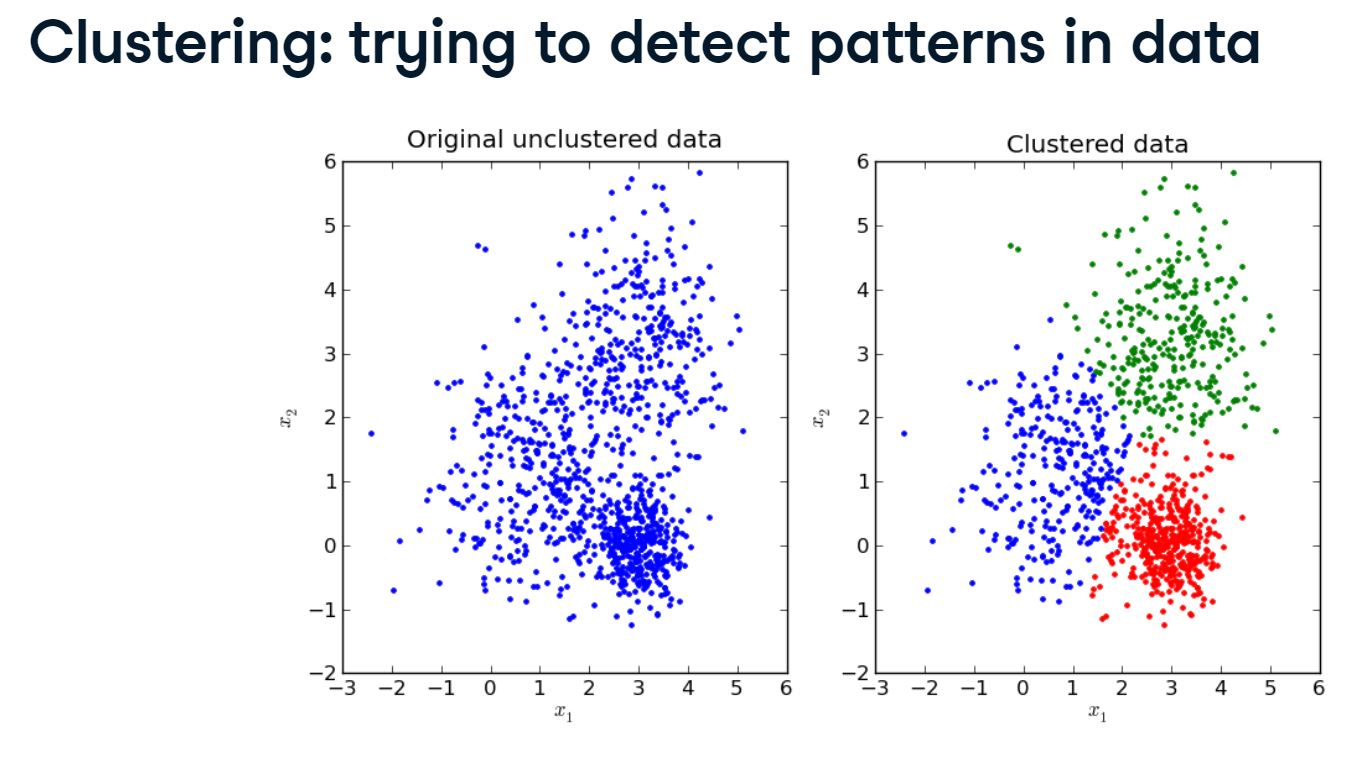

In this image you see a clear example where a cloud of data is clustered into three distinct clusters.


#### K-means clustering: using the distance to cluster centroids

So, let's talk about how we achieve this pattern detecting using K-means clustering. In this example, training samples are shown as dots and cluster centroids are shown as crosses. Let's say we try to cluster the data in image A. We start by putting in an initial guess for two cluster centroids in figure B. You need to predefine the amount of clusters, therefore, at the start.

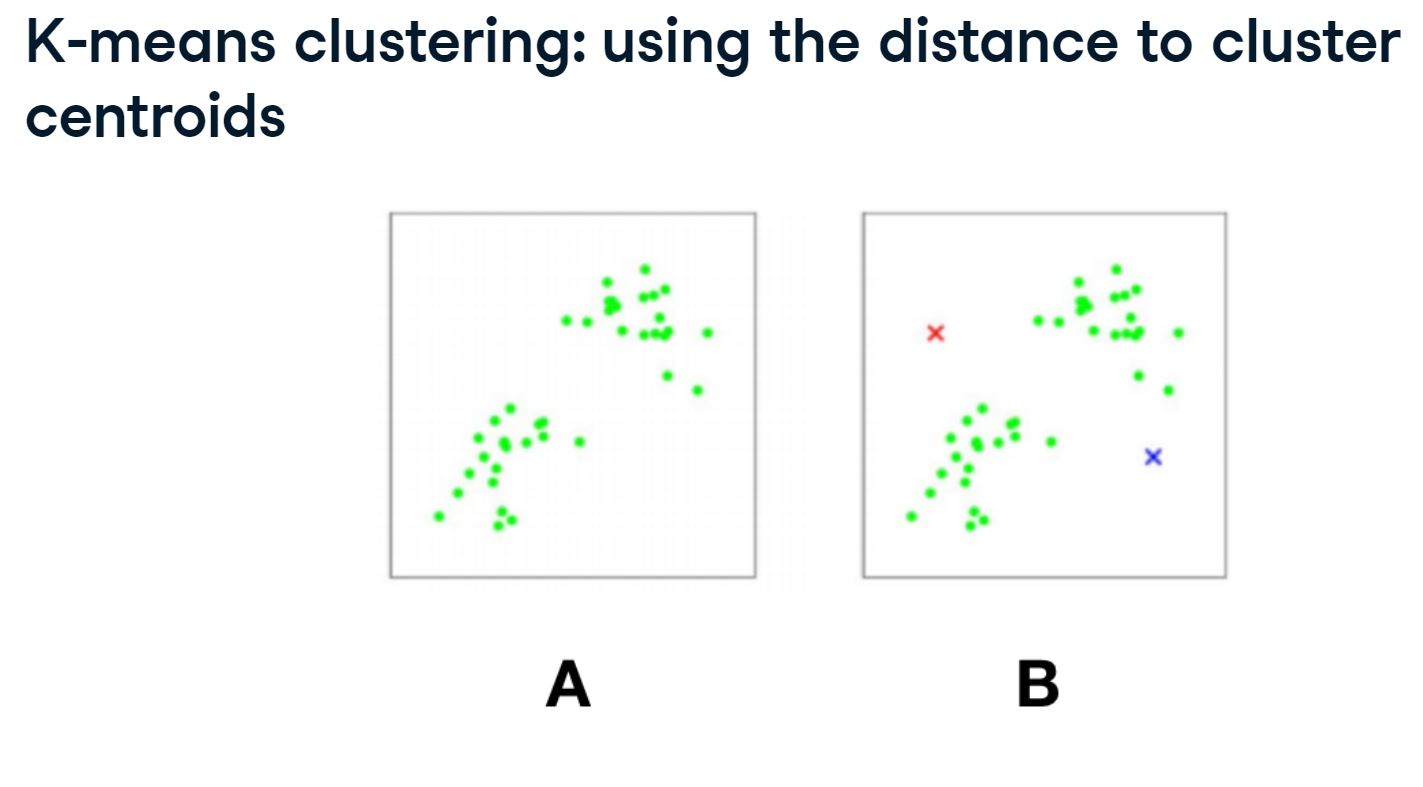

You then calculate the distances of each sample in the data to the closest centroid, in figure C, which allows you to split your data into the first two clusters.

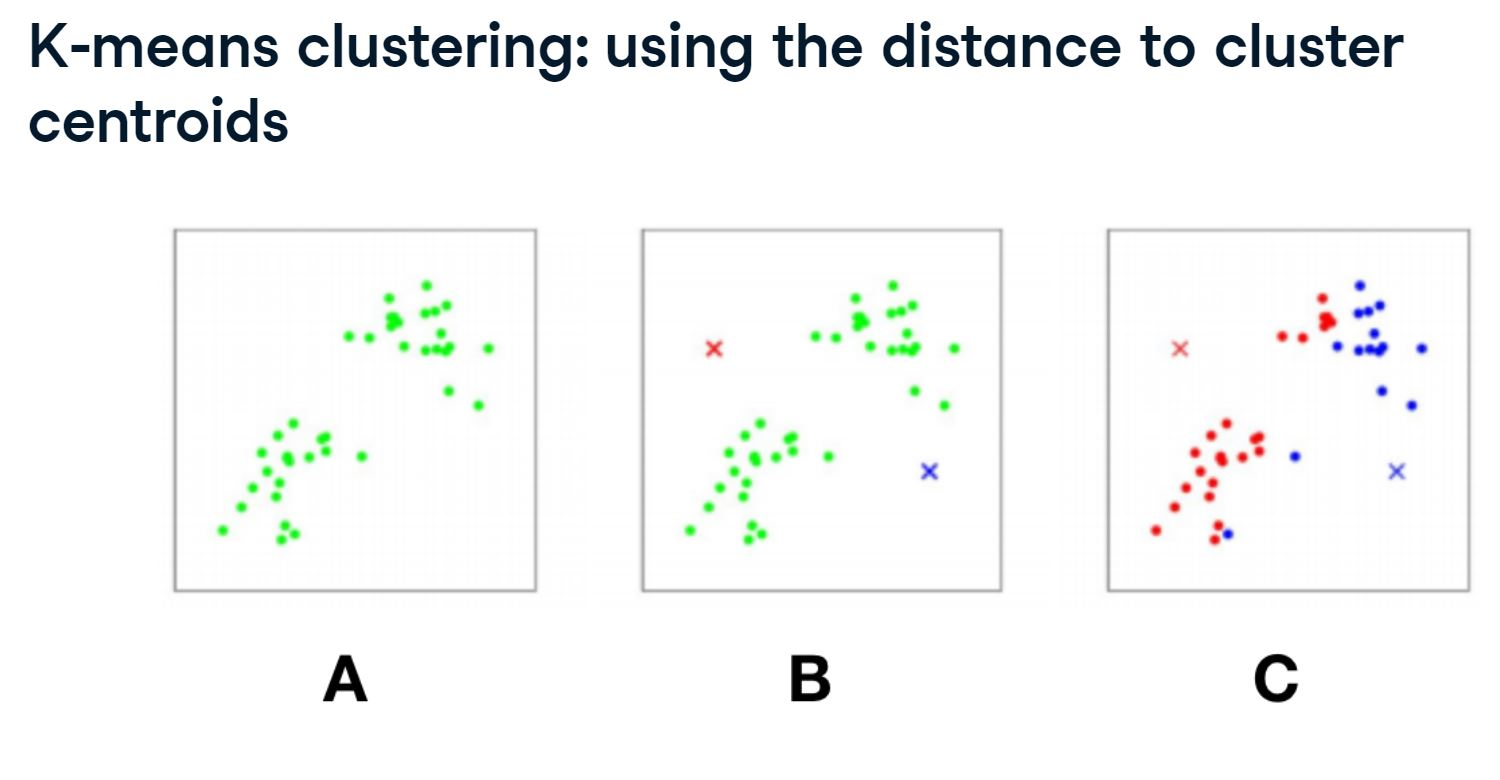

And based on these initial clusters, you can refine the location of the centroids to minimize the sum of all distances in the two clusters, as you can see here in picture D.

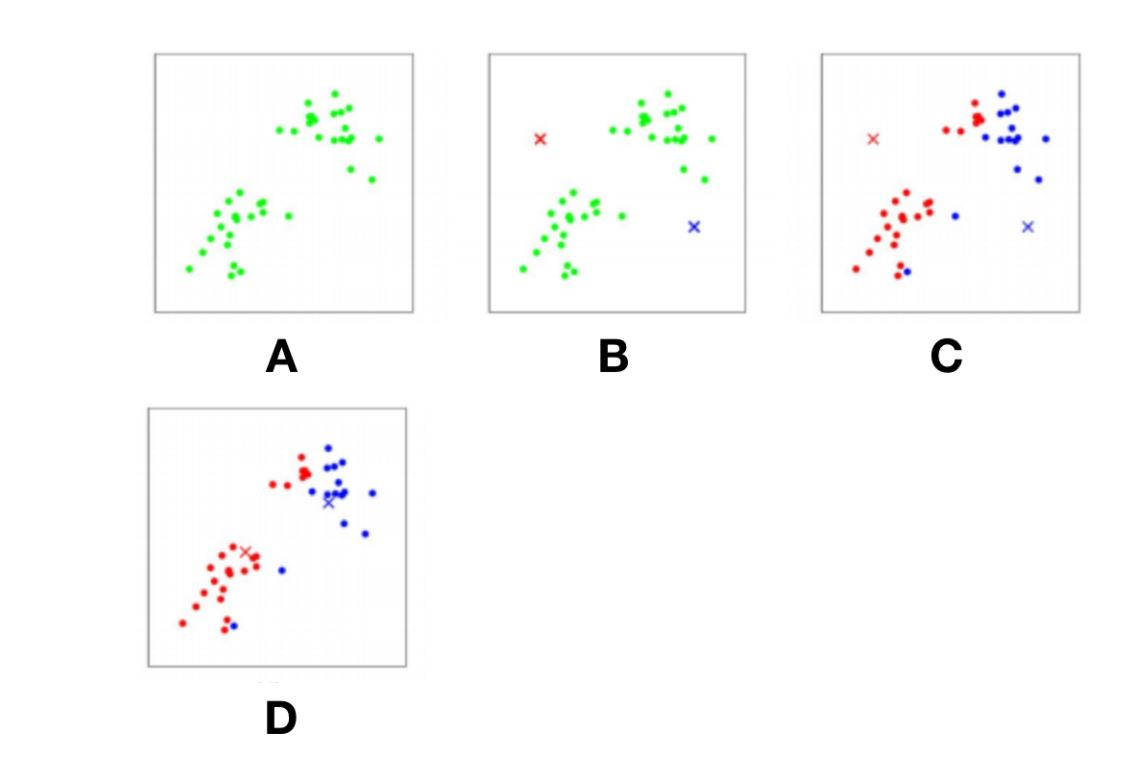

You then repeat the step of reassigning points that are nearest to the centroid, as shown in figure E, and so forth until it converges to the point where no sample gets reassigned to another cluster. The final clusters are depicted in picture F.

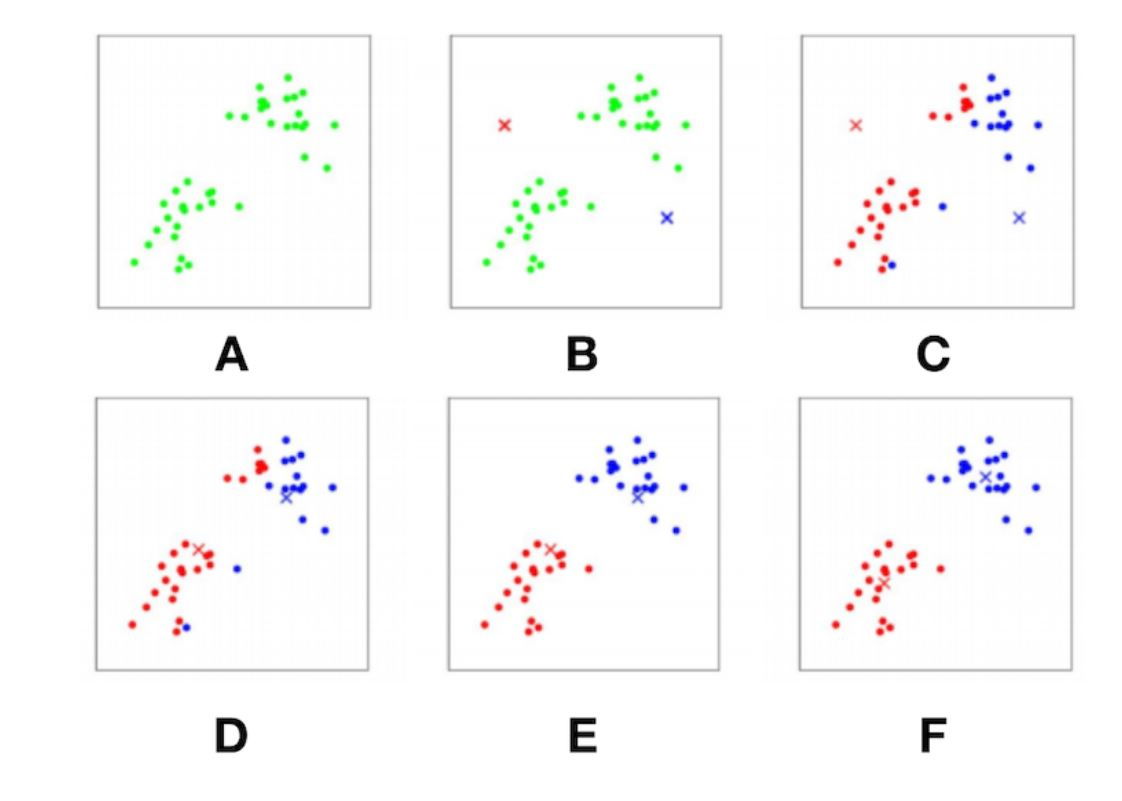

#### K-means clustering in Python

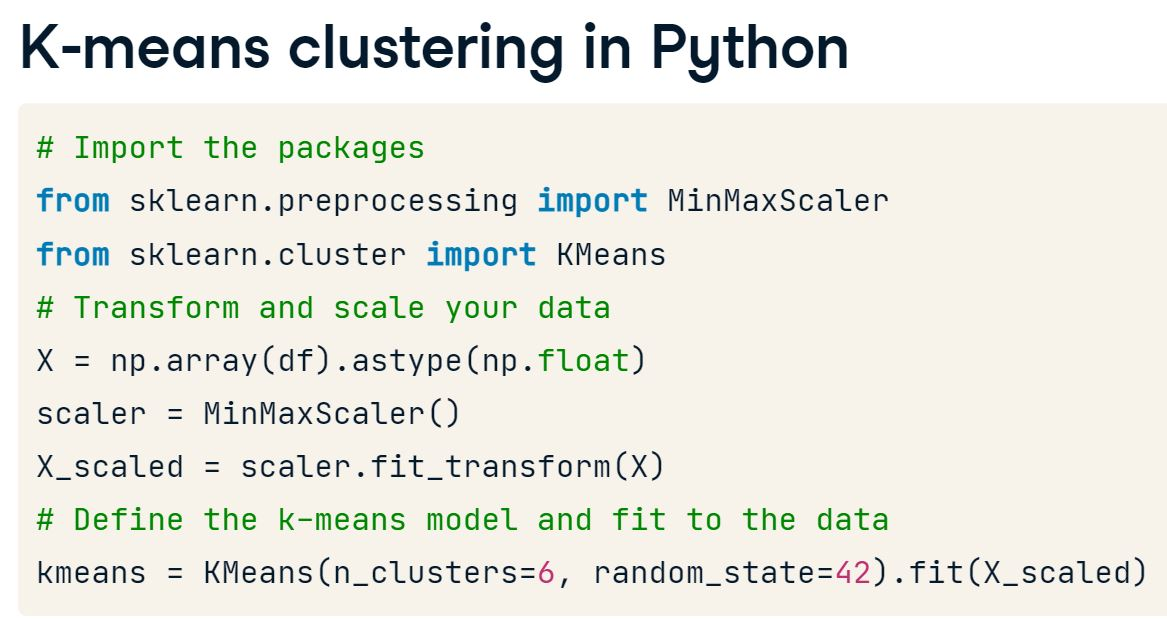

Let's see how to implement this in Python. You begin by importing the K-means model from scikit-learn, and also a scaling method. It is of utmost importance to scale your data before doing K-means clustering, or any algorithm that uses distances, for that matter. If you forget to scale, features on a larger scale will weigh more heavily in the algorithm, and you don't want that. All features should weigh equally at this point. In the first step, you transform the data stored under df, into a NumPy array and make sure all the data is of the type float. Second, you apply the MinMaxScaler and use fit_transform on the data, as this returns the scaled data. Now you are ready to define the K-means model with 6 clusters, and fit that straight to the scaled data, as seen here. It is wise to fix the random-state, to be able to compare models.

#### The right amount of clusters

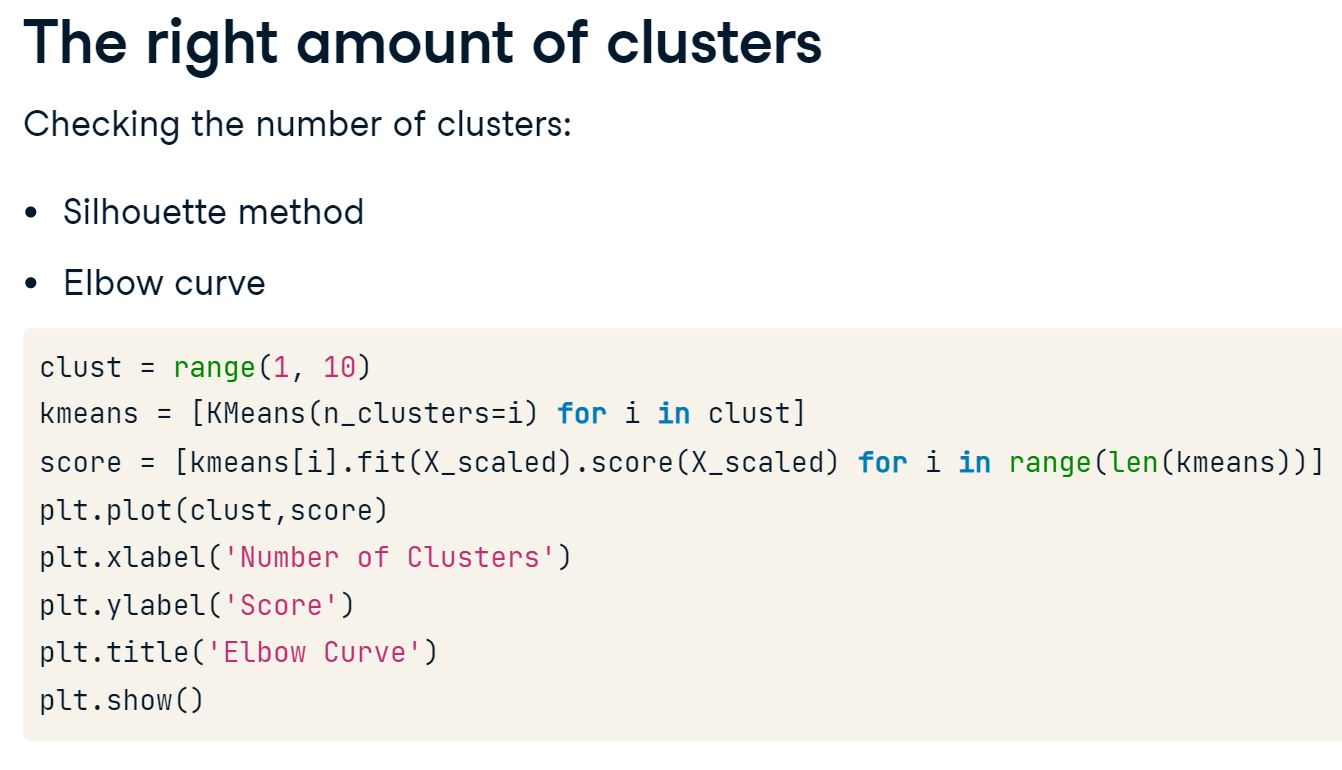

The drawback of K-means clustering is that you need to assign the number of clusters beforehand. There are multiple ways to check what the right amount of clusters should be, such as the silhouette method or the elbow curve. Let's do a quick refresher on the elbow curve. The objective of k-means is to minimize the sum of all distances between the data samples and their associated cluster centroids. The score is the inverse of that minimization, so you want the score to be close to zero. 

#### The elbow curve

By running a k-means model on clusters varying from 1 to 10, like this, and saving the scores for each model under score, you can obtain the elbow curve. Then it is a matter of simply plotting the scores against the number of clusters like this. Which results in the following plot.

This is an example of a typical elbow curve. The slight angle at K equals 3 suggests that 3 clusters could be optimal, although the optimal cluster number is not very pronounced in this case.

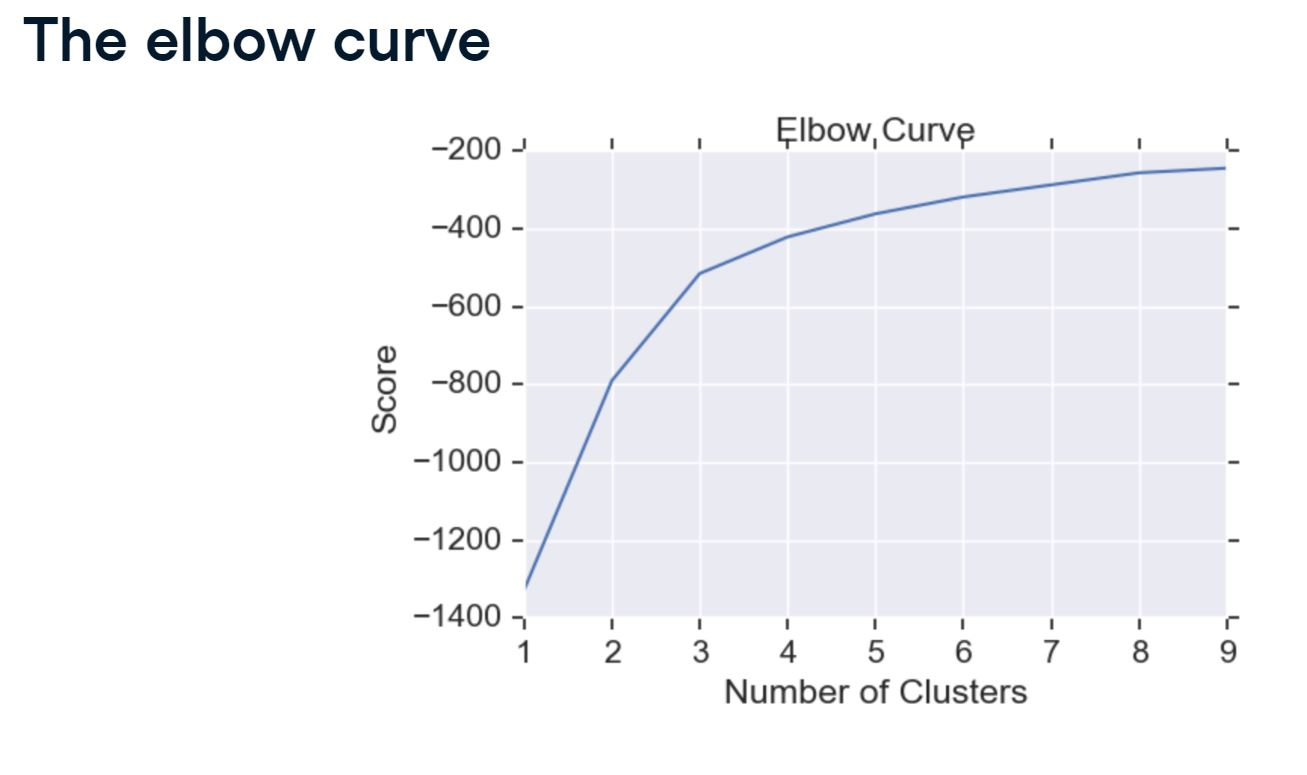

### 3.2.1 Scaling the data

For ML algorithms using distance based metrics, it is crucial to always scale our data, as features using different scales will distort our results. K-means uses the Euclidian distance to assess distance to cluster centroids, therefore we first need to scale our data before continuing to implement the algorithm. Let's do that first.

In [72]:
df_adj = pd.read_csv('data/banksim_adj.csv')
df_adj

Unnamed: 0  age    amount  fraud  M  es_barsandrestaurants  es_contents  \
0              0    3   49.7100      0  0                      0            0   
1              1    4   39.2900      0  0                      0            0   
2              2    3   18.7600      0  0                      0            0   
3              3    4   13.9500      0  1                      0            0   
4              4    2   49.8700      0  1                      0            0   
...          ...  ...       ...    ... ..                    ...          ...   
7184        7195    5  236.1474      1  1                      0            0   
7185        7196    5  139.6000      1  0                      0            0   
7186        7197    1  236.1474      1  0                      0            0   
7187        7198    1  236.1474      1  1                      0            0   
7188        7199    4  236.1474      1  0                      0            0   

      es_fashion  es_food  es_health  es_home  es_hotelservices  es_hyper  \
0              0        0          0        0                 0         0   
1              0        0          1        0                 0         0   
2              0        0          0        0                 0         0   
3              0        0          0        0                 0         0   
4              0        0          0        0                 0         0   
...          ...      ...        ...      ...               ...       ...   
7184           0        0          0        0                 1         0   
7185           0        0          0        0                 1         0   
7186           0        0          0        0                 0         0   
7187           0        0          0        0                 1         0   
7188           0        0          1        0                 0         0   

      es_leisure  es_otherservices  es_sportsandtoys  es_tech  \
0              0                 0                 0        0   
1              0                 0                 0        0   
2              0                 0                 0        0   
3              0                 0                 0        0   
4              0                 0                 0        0   
...          ...               ...               ...      ...   
7184           0                 0                 0        0   
7185           0                 0                 0        0   
7186           0                 0                 0        0   
7187           0                 0                 0        0   
7188           0                 0                 0        0   

      es_transportation  es_travel  
0                     1          0  
1                     0          0  
2                     1          0  
3                     1          0  
4                     1          0  
...                 ...        ...  
7184                  0          0  
7185                  0          0  
7186                  0          1  
7187                  0          0  
7188                  0          0  

[7189 rows x 19 columns]

In [73]:
y = df_adj.fraud.values
y

array([0, 0, 0, ..., 1, 1, 1])

In [74]:
type(y)

numpy.ndarray

In [75]:
# drop cols not required
df_adj = df_adj.drop(['Unnamed: 0', 'fraud'], axis=1)

In [76]:
# Import the scaler
from sklearn.preprocessing import MinMaxScaler

# Take the float values of df for X
X = df_adj.values.astype(np.float64)

# Define the scaler and apply to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
X_scaled.shape

(7189, 17)

### 3.2.2 K-means clustering

A very commonly used clustering algorithm is K-means clustering. For fraud detection, K-means clustering is straightforward to implement and relatively powerful in predicting suspicious cases. It is a good algorithm to start with when working on fraud detection problems. However, fraud data is oftentimes very large, especially when you are working with transaction data. MiniBatch K-means is an efficient way to implement K-means on a large dataset.

In [ ]:
# Import MiniBatchKmeans 
from sklearn.cluster import MiniBatchKMeans

# Define the model 
kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

We have now fitted our MiniBatch K-means model to the data. In the upcoming sections we will explore whether this model is any good at flagging fraud. But before doing that, we still need to figure our what the right number of clusters to use is. 

### 3.2.3 Elbow method

In the previous exercise we implemented MiniBatch K-means with 8 clusters, without actually checking what the right amount of clusters should be. For our first fraud detection approach, it is important to get the number of clusters right, especially when we want to use the outliers of those clusters as fraud predictions. To decide which amount of clusters we are going to use, let's apply the Elbow method and see what the optimal number  clusters should be based on this method.

/home/stephen137/mambaforge/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/stephen137/mambaforge/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/stephen137/mambaforge/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/stephen137/mambaforge/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


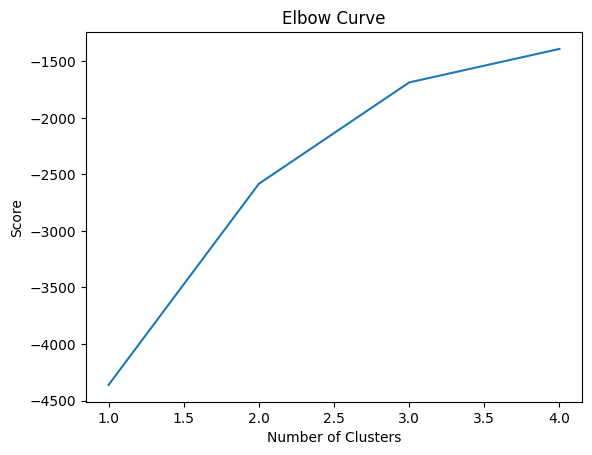

In [79]:
# Define the range of clusters to try
clustno = range(1, 5)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i, random_state=0) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Now we can see that the optimal number of clusters should probably be at around 3 clusters, as that is where the elbow is in the curve. We'll use this in the next exercise as our baseline model, and see how well this does in detecting fraud.

### 3.3 Assigning fraud versus non-fraud

#### Starting with clustered data

It all starts with your optimized model, it can be k-means or any other clustering method, for that matter. In a nutshell, you're going to take the outliers of each cluster, and flag those as fraud. In this example, you're looking at three clusters.

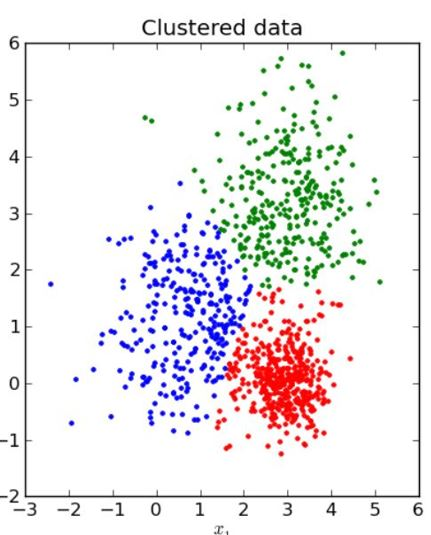

#### Assign the cluster centroids

In the first step, you need to collect and store the cluster centroids in memory, as that is the starting point to decide what's normal and what's not.

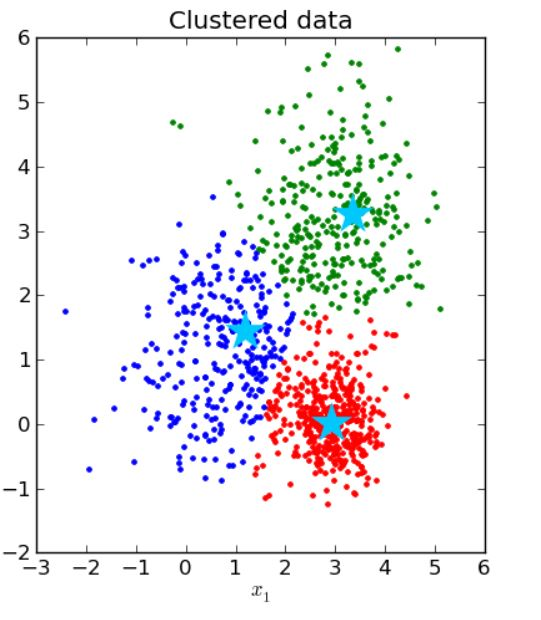


#### Define distances from the cluster centroid

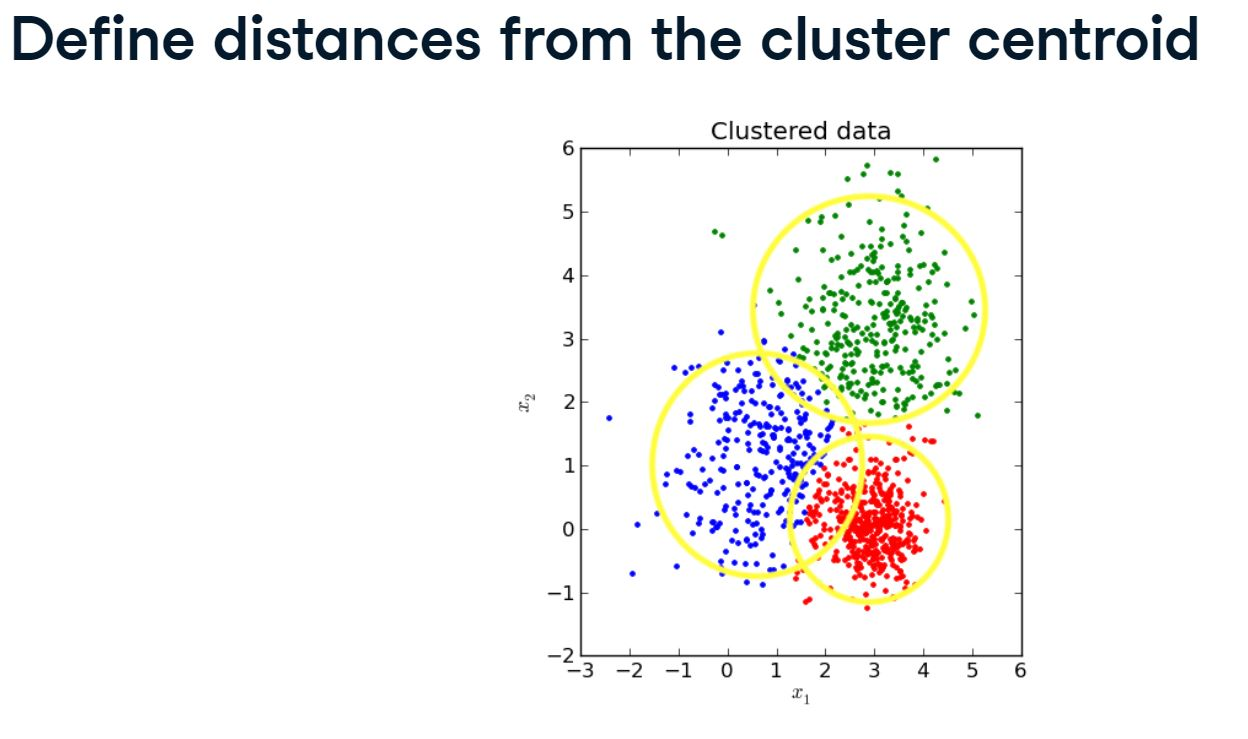

The next step is to calculate the distance of each point in the dataset, to their own cluster centroid. In this case, I use the Euclidean distance, hence you see these depicted as round circles. You then also need to define a cut-off point for the distances to define what is an outlier. You do this based on the distributions of the distances collected. Suppose you decide everything that has a bigger distance than the top 95th percentile, should be considered an outlier, ie you take the tail of the distribution of distances. In this case, that would mean that anything that falls outside the round circles, is considered an outlier.

#### Flag fraud for those furthest away from cluster centroid

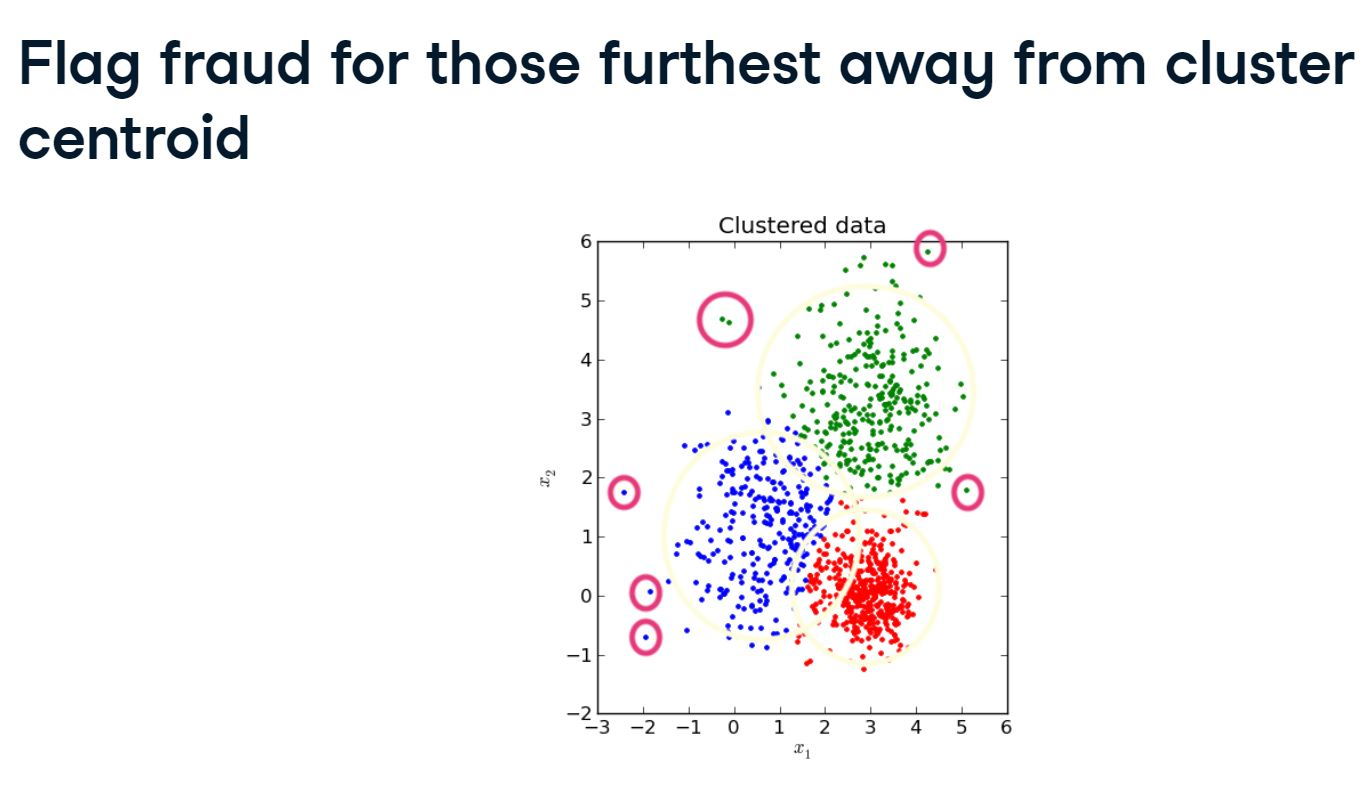

As you see in the example here, that means that you are indeed mostly flagging the odd samples that lie very far outside of the cluster centroids. These are definitely outliers and can thus be described as abnormal or suspicious. However, keep in mind that it doesn't necessarily mean that these observations are also fraudulent. They are, compared to the majority of normal behavior, just odd.

#### Flagging fraud based on distance to centroid

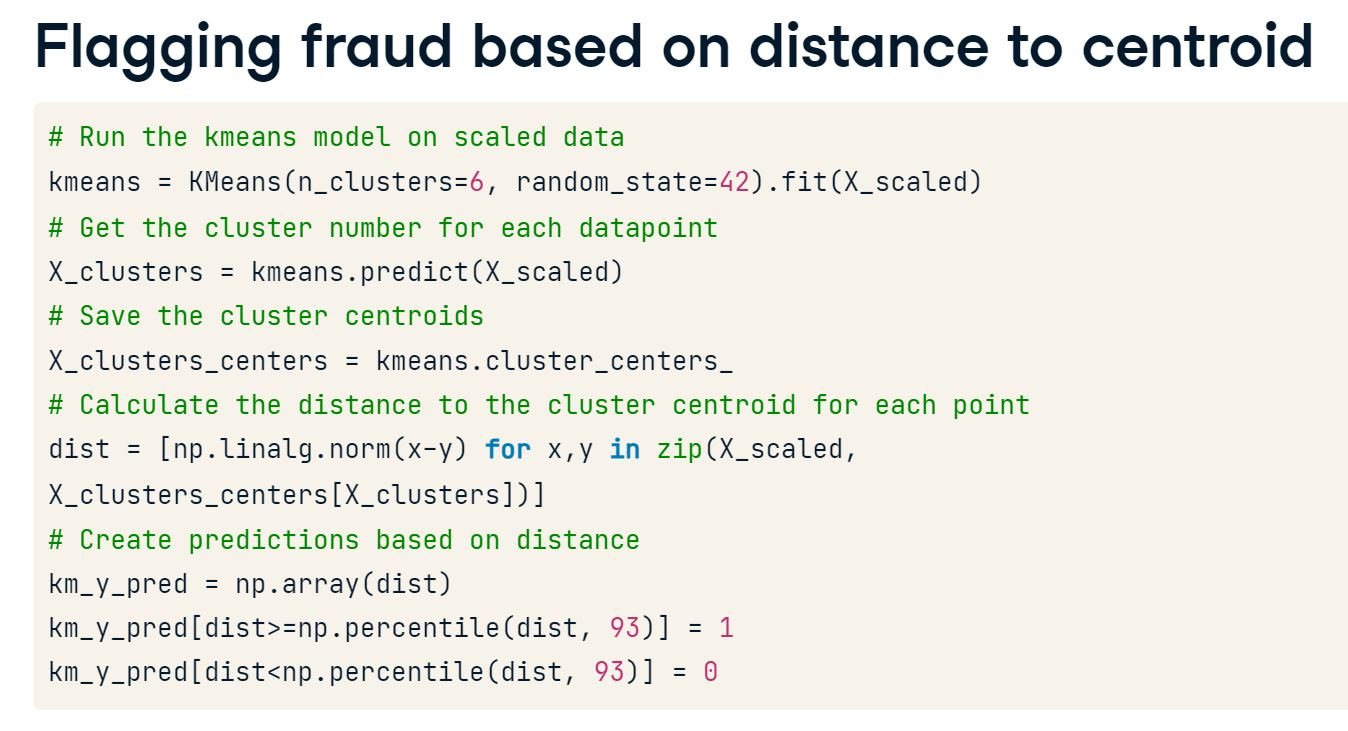

In python, the steps to do this are exactly the steps that I've just described in pictures. It all starts with your trained clustering model, in this case, k-means. You then need to assign to which cluster each data point belongs to with the predict function, and store those results. Next, you need to save the cluster-centers with this function. Then, it's time to calculate the distance of each data point to its cluster centroid. As you can see, I use the norm function from NumPy's linear algebra package, which returns the vector norm, ie the vector of distance for each data point to their assigned cluster. Last, you use the percentiles of the distances to determine which samples are outliers. Here, I take the 93rd percentile using NumPy's percentile function, and flag it with a one if it is bigger than that. Those are the final fraud predictions.

#### Validating your model results

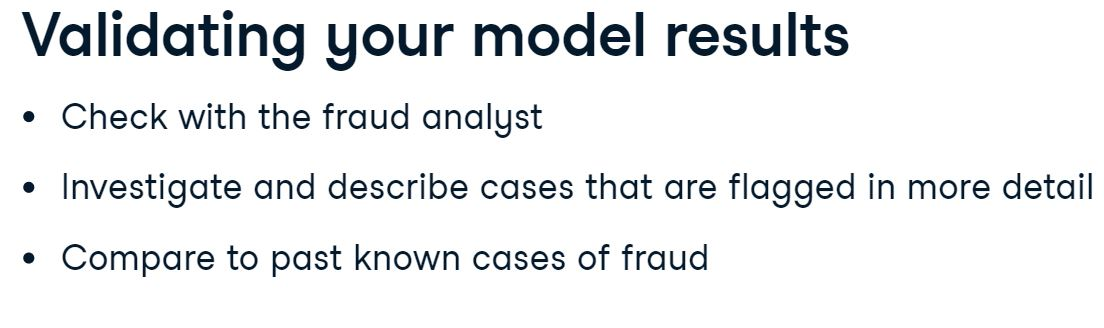

Normally, this is where it gets difficult. If you don't have original fraud labels, you can't run the usual performance metrics, hence you need some other way to sense check your results. The best way to do so is to collaborate closely with your fraud expert, and let them have a look at the predictions and investigate further. Second, you want to understand why these cases are outliers. Are they truly fraudulent or just very rare cases of legit data in your sample? If it is just a rare but non-fraudulent cases, you can avoid that by deleting certain features, or removing those cases from the data altogether. If you do have some past cases of fraud, a good way is to see whether your model can actually predict those when you test your model on historic data. In the exercises, you'll use original fraud labels to check our model performance, but do keep in mind this is usually not possible.


### 3.3.1 Detecting outliers

Let's use the K-means algorithm to predict fraud, and compare those predictions to the actual labels that are saved, to sense check our results. The fraudulent transactions are typically flagged as the observations that are furthest aways from the cluster centroid. We'll learn how to do this and how to determine the cut-off.

In [80]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

/home/stephen137/mambaforge/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [81]:
# Obtain the ROC score
print(roc_auc_score(y_test,km_y_pred))

0.8197704982668266


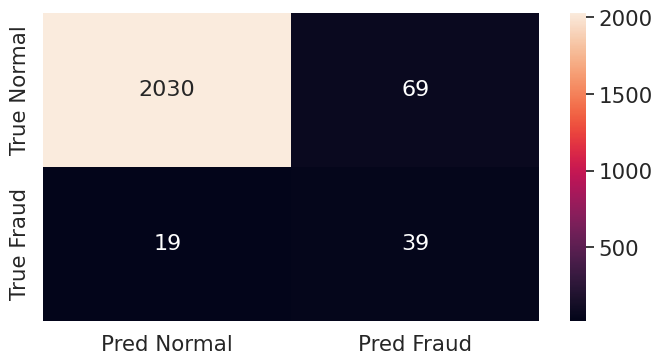

In [82]:
# Create a confusion matrix
km_cm = confusion_matrix(y_test, km_y_pred)

# Plot the confusion matrix in a figure to visualize results 

def plot_confusion_matrix(km_cm):
  df_cm = pd.DataFrame(km_cm, ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
  plt.figure(figsize = (8,4))
  sn.set(font_scale=1.4) 
  sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')
  plt.show()

plot_confusion_matrix(km_cm)

If we were to lower the threshold for cases flagged as fraud from the current 95th percentile, we would flag more cases overall but thereby also get more false positives.

### 3.4 Other clustering fraud detection methods

#### There are many different clustering methods

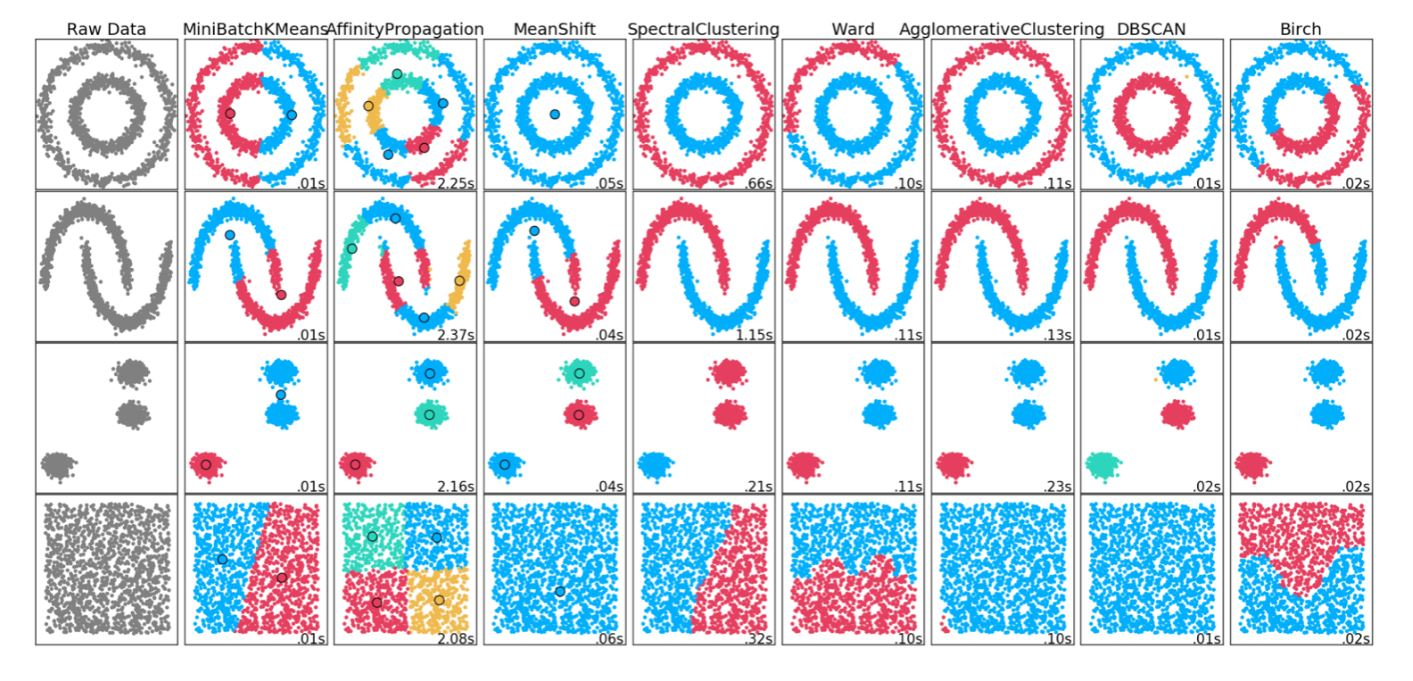

Each clustering method has its pros and cons. K-means works well when your data is clustered in normal, round shapes. As you can see in this picture, when data is clustered in very different shapes, it does not perform so well. In this picture, you see the clustering method DBSCAN performing quite well, in fact.

#### And different ways of flagging fraud: using smallest clusters

Apart from other clustering methods, there are also other ways to flag fraud, not just based on cluster outliers. Rather than treating fraud as the oddball outlier in the existing clusters, you can also use the smallest clusters as an indication of fraud, as pictured here. 

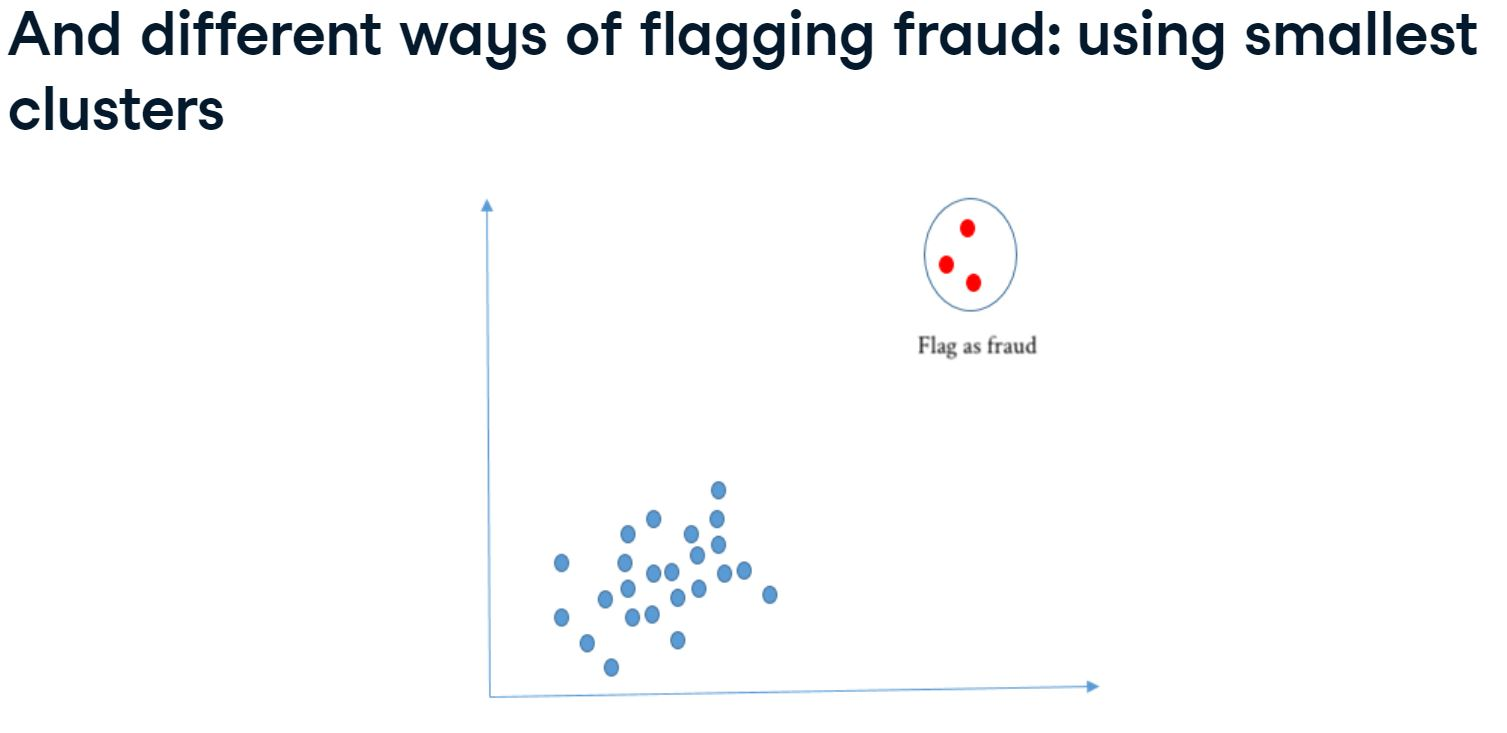

You can use this approach when fraudulent behavior has commonalities, and thus will cluster together in your data. In that sense, you would expect it to cluster in tiny groups, rather than be the outliers in the larger clusters.


#### In reality it looks more like this

The previous image was a perfect world example, but in reality, you will likely be looking at data that looks more like this.

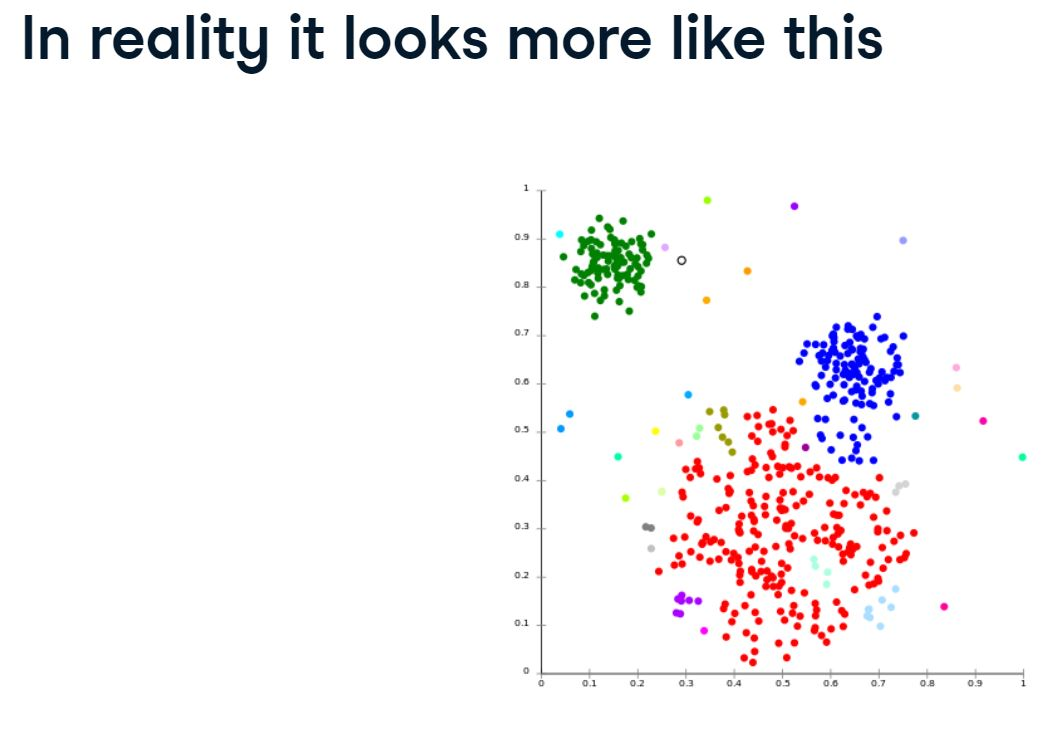

In this case, you see three obvious clusters, and a few dots that are clearly separate from the rest. As you can see, those smallest dots are outliers and outside of what you would describe as normal behavior. However, there are also medium to small clusters closely connected to the red cluster, so it's not very straightforward. In fact, if you can visualize your data with, for example, PCA, it can be quite helpful to do so.

#### DBSCAN versus K-means

So let's talk a bit more about DBSCAN. DBSCAN stands for `Density-Based Spatial Clustering of Applications with Noise`. One benefit is that you do not need to predefine the number of clusters. The algorithm finds core samples of high density and expands clusters from them. This works well on data which contains clusters of similar density. **This is a type of algorithm you can use to identify fraud as very small clusters.**

Things you do need to assign in the DBSCAN model are the maximum allowed distance between data within clusters, and the minimal number of data points in clusters. As you already saw before, DBSCAN performs well on weirdly shaped data, but is computationally much heavier than, for example, mini-batch K-means.

#### Implementing DBSCAN

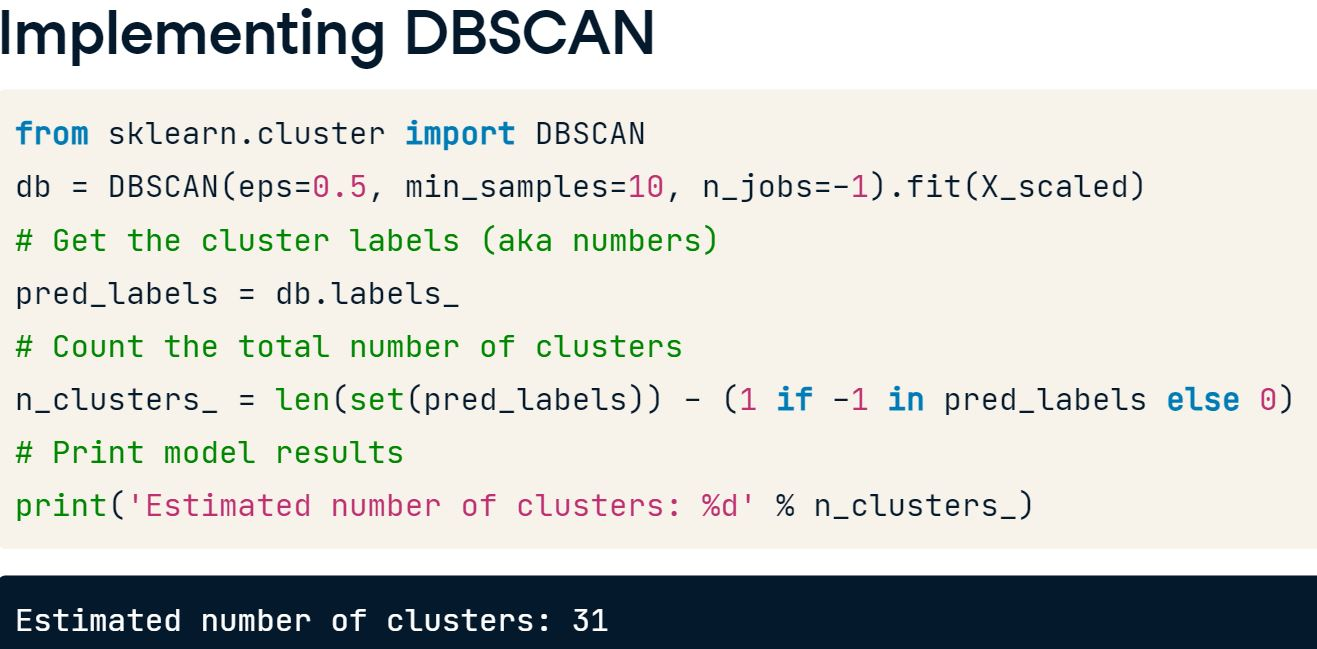

Implementing DBSCAN is relatively straightforward. 

You start by defining:

- epsilon, `eps`. This is the `distance between data points` allowed from which the cluster expands. 
- minimum samples in the cluster. 

Conventional DBSCAN cannot produce the optimal value of epsilon, and it requires sophisticated DBSCAN modifications to determine the optimal epsilon value automatically, which is beyond the scope of this course. You need to fit DBSCAN to your scaled data. You can use the labels function to get the assigned cluster labels for each data point. You can also count the number of clusters by counting the unique cluster labels from the cluster label predictions. I use the length of the predicted labels here to do so, but you can do this in different ways.

#### Checking the size of the clusters

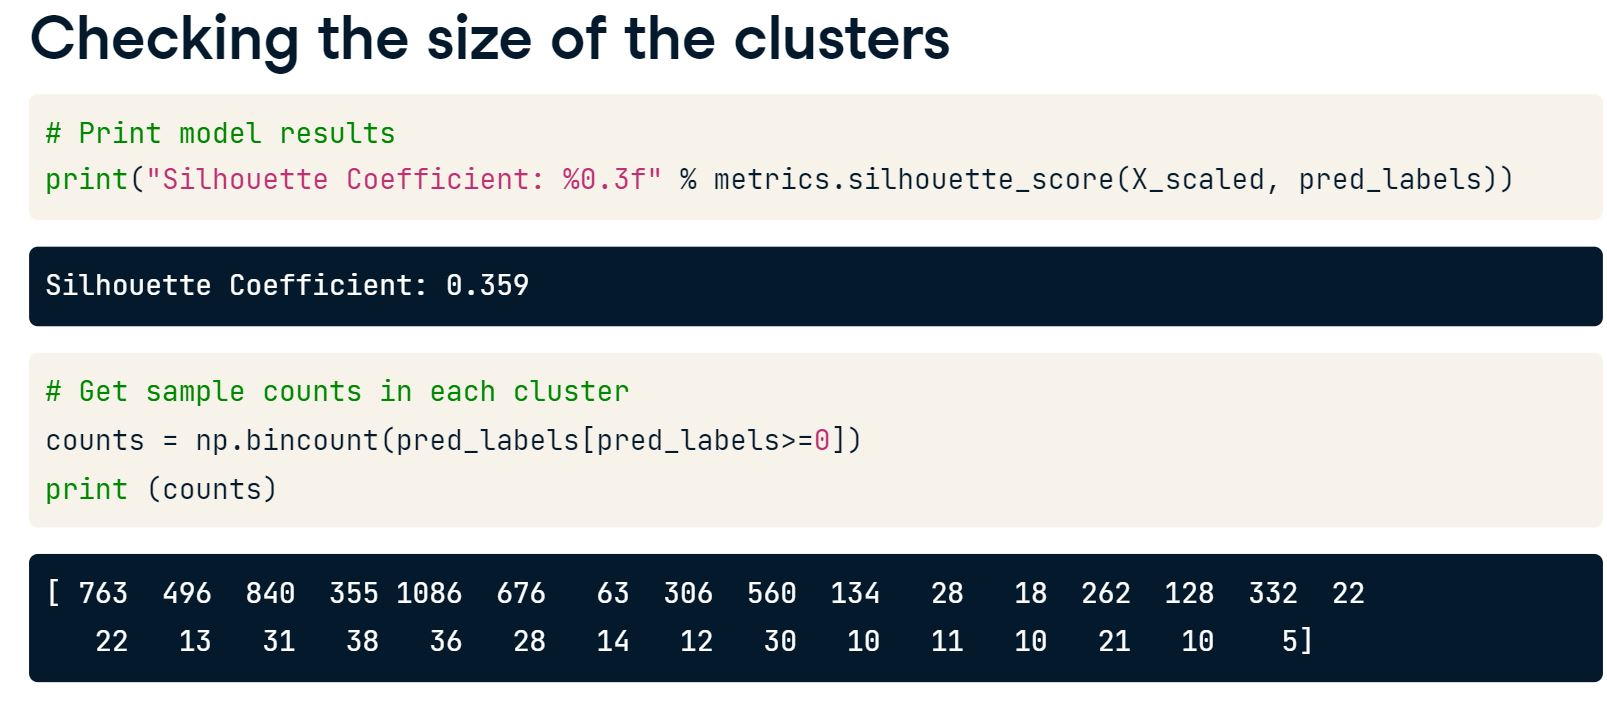

The DBSCAN model can also have performance metrics, such as the average silhouette score. Suppose you want to calculate the size of each cluster. You can use NumPy's `.bincount()` function for this. 

Bincount counts the number of occurrences of each value in a NumPy array, but only works on non-negative numbers. You can use this to calculate the size of each cluster. From here, you can sort on size and decide how many of the smaller clusters you want to flag as fraud. This last bit is trial and error, and will also depend on how many fraud cases the fraud team can deal with on a regular basis.

### 3.4.1 DBSCAN

The advantage of DBSCAN is that you do not need to define the number of clusters beforehand. Also, DBSCAN can handle weirdly shaped data (i.e. non-convex) much better than K-means can. This time, you are not going to take the outliers of the clusters and use that for fraud, but take the smallest clusters in the data and label those as fraud.

In [83]:
# Import DBSCAN
from sklearn.cluster import DBSCAN

# Initialize and fit the DBSCAN model
db = DBSCAN(eps=0.9, min_samples=10, n_jobs=-1).fit(X_scaled)

# Obtain the predicted labels and calculate number of clusters
pred_labels = db.labels_
n_clusters = len(set(pred_labels)) - (1 if -1 in y else 0)

# Print performance metrics for DBSCAN
print('Estimated number of clusters: %d' % n_clusters)
print("Homogeneity: %0.3f" % homogeneity_score(y, pred_labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_scaled, pred_labels))

Estimated number of clusters: 23
Homogeneity: 0.612
Silhouette Coefficient: 0.713


The number of clusters is much higher than with K-means. For fraud detection this is for now OK, as we are only interested in the smallest clusters, since those are considered as abnormal. Now let's have a look at those clusters and decide which one to flag as fraud.

### 3.4.2 Assessing smallest clusters

We need to:

- figure out how big the clusters are, and filter out the smallest 
- take the smallest ones and flag those as fraud
- check with the original labels whether this does actually do a good job in detecting fraud

In [84]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels >= 0])

# Print the result
print(counts)

[3252  145 2714   55  174  119  122   98   54   15   76   15   43   25
   51   47   42   15   25   20   19   10]


In [85]:
# Sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts)[:3]

# Print the results 
print("The smallest clusters are clusters:")      
print(smallest_clusters)

The smallest clusters are clusters:
[21 17  9]


In [86]:
# Print the counts of the smallest clusters only
print("Their counts are:")      
print(counts[smallest_clusters])

Their counts are:
[10 15 15]


So now we know which smallest clusters we could flag as fraud. If we were to take more of the smallest clusters, we cast our net wider and catch more fraud, but most likely also more false positives. It is up to the fraud analyst to find the right amount of cases to flag and to investigate

### 3.4.3 Checking results

We wil now check the results of your DBSCAN fraud detection model. In reality, we often don't have reliable labels and this where a fraud analyst can help you validate the results. They can check your results and see whether the cases you flagged are indeed suspicious. WE can also check historically known cases of fraud and see whether our model flags them.

In [87]:
# Create a dataframe of the predicted cluster numbers and fraud labels 
df = pd.DataFrame({'clusternr':pred_labels,'fraud':y})

# Create a condition flagging fraud for the smallest clusters 
df['predicted_fraud'] = np.where((df['clusternr']==21)| (df['clusternr']==17) | (df['clusternr']==9), 1, 0)

# Run a crosstab on the results 
print(pd.crosstab(df['fraud'], df['predicted_fraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              6973  16
1               176  24


The good thing is: out of all flagged cases, 16 out of 40, or 60% are actually fraud. Since we only take the three smallest clusters, by definition we flag less cases of fraud, so we catch less but also have less false positives. However, we are missing quite a lot of fraud cases. Increasing the amount of smallest clusters we flag could improve that, at the cost of more false positives of course. 

In the next section we will learn how to further improve fraud detection models by including text analysis.

## 4. Fraud detection using text

This section focuses on using unsupervised learning techniques to detect fraud. We will segment customers, use K-means clustering and other clustering algorithms to find suspicious occurrences in our data.



### 4.1 Using text data


#### You will often encounter text data during fraud detection

During fraud analysis, almost always, there will be some sort of textual data available that you can use to your advantage. It can be emails between the company and its clients, or emails within the company. Descriptions of bank transactions are a good example also. It can be that a client service team leaves notes on a client account. Insurance claims are full of textual data, and it may even be the case that there are recorded telephone conversations. And this list goes on. It is, therefore, important to know how to handle textual data, when working on fraud detection problems.

#### Text mining techniques for fraud detection

When using text data in fraud analysis, there are multiple ways to use the data. A common application is a word search, to flag any data mentioning certain terms. `Sentiment analysis`, aka measuring how positive or negative a text is, can be another interesting application, which you could also combine with a word search. More straightforward, you can check whether text data associated with fraud tends to be more positive or negative, relative to the normal text. Topic analysis and counting the frequency of certain words of interest, is another powerful application for fraud detection. We will cover this in more detail later. A last way to use text data is to analyze the style of fraud data and search for text that is similar in style to flag for fraud.

#### Word search for fraud detection

Suppose you want to flag all client transactions that mention a certain gambling company, as this company has received bad press lately. A simple word search on all transactions and client emails can easily filter whether any of your clients mention this company. You can then either use these results as a filter, or a flag on its own, or simply as an additional feature in your machine learning model. You can do all this with a few simple lines of code. Let's have a look at how it's done.

#### Word counts to flag fraud with pandas

Pandas has functions that allow you to do operations on text data within a pandas series or DataFrame. 

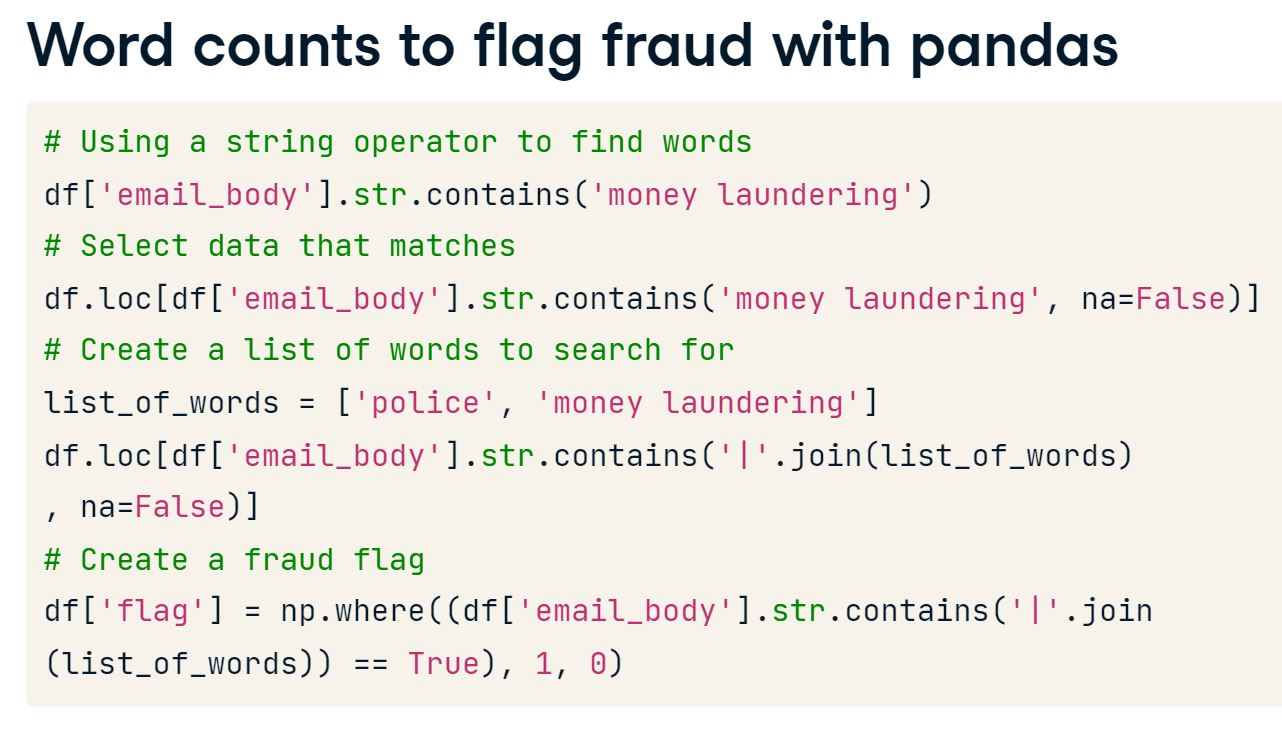

In this example, I use the string-dot-contains function to find all rows that contain the words money laundering. You can very easily use this command to select the rows that contain these words in your DataFrame. You need to use na equals False to ignore all rows containing missing values, otherwise the indexer won't work. Suppose you want to filter on a list of words, rather than just one. This is also easily done, by the using string contains function. You need to join the list of words with the or command, so you search on whether the text contains this or that word. From then on it is easy to create a flag for data that contain these words. By using the NumPy where function, you can simply create a new variable that flags one where the condition is met, and zero otherwise.

### 4.1.1 Word search with dataframes

In this exercise we will work with text data, containing emails from Enron employees. The Enron scandal is a famous fraud case. Enron employees covered up the bad financial position of the company, thereby keeping the stock price artificially high. Enron employees sold their own stock options, and when the truth came out, Enron investors were left with nothing. The goal is to find all emails that mention specific words, such as "sell enron stock".

By using string operations on dataframes, we can easily sift through messy email data and create flags based on word-hits. 

In [88]:
df= pd.read_csv('data/enron_emails_clean.csv')
len(df)

2090

In [89]:
df.head()

Message-ID  \
0   <8345058.1075840404046.JavaMail.evans@thyme>   
1   <1512159.1075863666797.JavaMail.evans@thyme>   
2  <26118676.1075862176383.JavaMail.evans@thyme>   
3  <10369289.1075860831062.JavaMail.evans@thyme>   
4  <26728895.1075860815046.JavaMail.evans@thyme>   

                              From                               To  \
0  ('advdfeedback@investools.com')  ('advdfeedback@investools.com')   
1    ('richard.sanders@enron.com')    ('richard.sanders@enron.com')   
2            ('m..love@enron.com')            ('m..love@enron.com')   
3     ('leslie.milosevich@kp.org')     ('leslie.milosevich@kp.org')   
4     ('rtwait@graphicaljazz.com')     ('rtwait@graphicaljazz.com')   

                  Date                                            content  \
0  2002-01-29 23:20:55  INVESTools Advisory\nA Free Digest of Trusted ...   
1  2000-09-20 19:07:00  ----- Forwarded by Richard B Sanders/HOU/ECT o...   
2  2001-10-30 16:15:17  hey you are not wearing your target purple shi...   
3  2002-01-30 17:54:18  Leslie Milosevich\n1042 Santa Clara Avenue\nAl...   
4  2002-01-30 19:36:01  Rini Twait\n1010 E 5th Ave\nLongmont, CO 80501...   

                                       clean_content  
0  investools advisory free digest trusted invest...  
1  forwarded richard b sanders hou ect pm justin ...  
2  hey wearing target purple shirt today mine wan...  
3  leslie milosevich santa clara avenue alameda c...  
4  rini twait e th ave longmont co rtwait graphic...

In [90]:
# Find all cleaned emails that contain 'sell enron stock'
mask = df['clean_content'].str.contains('sell enron stock', na=False)
mask.value_counts()

clean_content
False    2089
True        1
Name: count, dtype: int64

In [91]:
# Select the data from df using the mask
print(df.loc[mask])

                                       Message-ID                        From  \
154  <6336501.1075841154311.JavaMail.evans@thyme>  ('sarah.palmer@enron.com')   

                             To                 Date  \
154  ('sarah.palmer@enron.com')  2002-02-01 14:53:35   

                                               content  \
154  \nJoint Venture: A 1997 Enron Meeting Belies O...   

                                         clean_content  
154  joint venture enron meeting belies officers cl...  


We can see that searching for particular string values in a dataframe can be relatively easy, and allows us to include textual data into our model or analysis. We can use this word search as an additional flag, or as a feauture in our fraud detection model. Let's now have a look at how to filter the data using multiple search terms.

### 4.1.2 Using list of terms

Sometimes you don't want to search on just one term. You probably can create a full "fraud dictionary" of terms that could potentially flag fraudulent clients and/or transactions. Fraud analysts often will have an idea what should be in such a dictionary. In this example we will flag a multitude of terms, and create a new flag variable out of it. The 'flag' can be used either directly in a machine learning model as a feature, or as an additional filter on top of our machine learning model results.

In [92]:
# Create a list of terms to search for
searchfor = ['enron stock', 'sell stock', 'stock bonus', 'sell enron stock']

# Filter cleaned emails on searchfor list and select from df 
filtered_emails = df.loc[df['clean_content'].str.contains('|'.join(searchfor), na=False)]
print(filtered_emails)

                                         Message-ID  \
0      <8345058.1075840404046.JavaMail.evans@thyme>   
1      <1512159.1075863666797.JavaMail.evans@thyme>   
2     <26118676.1075862176383.JavaMail.evans@thyme>   
3     <10369289.1075860831062.JavaMail.evans@thyme>   
4     <26728895.1075860815046.JavaMail.evans@thyme>   
...                                             ...   
1151  <15875618.1075860830584.JavaMail.evans@thyme>   
1450  <30798399.1075841348382.JavaMail.evans@thyme>   
1473    <957052.1075861359136.JavaMail.evans@thyme>   
1557  <18936682.1075861158419.JavaMail.evans@thyme>   
1621   <5472336.1075841501893.JavaMail.evans@thyme>   

                                   From                                 To  \
0       ('advdfeedback@investools.com')    ('advdfeedback@investools.com')   
1         ('richard.sanders@enron.com')      ('richard.sanders@enron.com')   
2                 ('m..love@enron.com')              ('m..love@enron.com')   
3          ('leslie.milosev

By joining the search terms with the 'or' sign, i.e. `|`, we can search on a multitude of terms in our dataset very easily. Let's now create a flag from this which we can use as a feature in a machine learning model.

### 4.1.3 Creating a flag

Let's create an actual flag variable that gives a `1` when the emails get a hit on the search terms of interest, and `0` otherwise. This is the last step we need to make in order to actually use the text data content as a feature in a machine learning model, or as an actual flag on top of model results. 

In [93]:
# Create flag variable where the emails match the searchfor terms
df['flag'] = np.where((df['clean_content'].str.contains('|'.join(searchfor)) == True), 1, 0)

# Count the values of the flag variable
count = df['flag'].value_counts()
print(count)

flag
0    1776
1     314
Name: count, dtype: int64


We have now managed to search for a list of strings in several lines of text data. These skills come in handy when you want to flag certain words based on what you discovered in your topic model, or when you know beforehand what you want to search for. In the next sections we will learn how to clean text data and to create our own topic model to further look for indications of fraud in our text data.

### 4.2 Text mining to detect fraud

#### Cleaning your text data

Whenever you work with text data, be it for word search, topic modeling, sentiment analysis, or text style, you need to do some rigorous text cleaning in order to be able to work with the data. Here are four steps you must take, before working with the data further :

1. split the text into sentences, and the sentences into words. Transform everything into lowercase and remove punctuation. This is called tokenization. 

2. remove all stopwords as they mess up your data. Luckily, there are dictionaries for this to help you do that. 

3. lemmatize words. For example, this means changing words from third person into first person, changing verbs in past and future tenses into present tenses. This allows you to combine all words that point to the same thing. 

4. all verbs need to be stemmed, such that they are reduced to their root form. For example, walking and walked are reduced to just their stem, walk.

When you take these four steps, it allows you to go from this type of data:

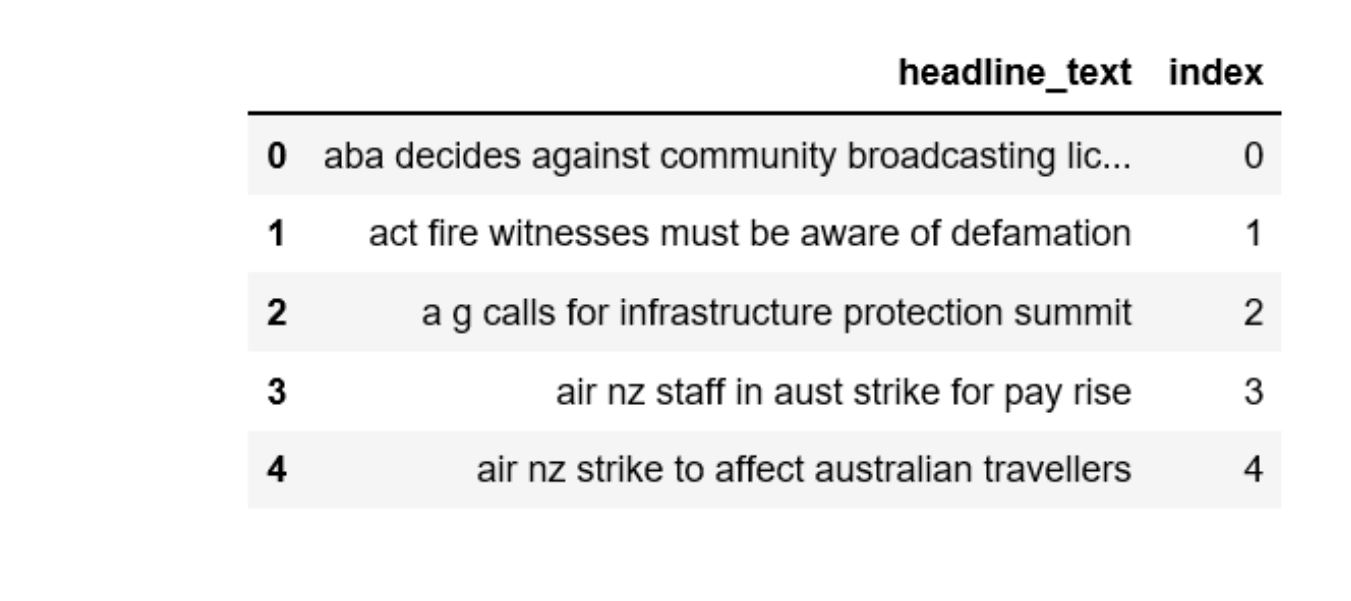

to this nice, clean, structured list of words per dataframe row:

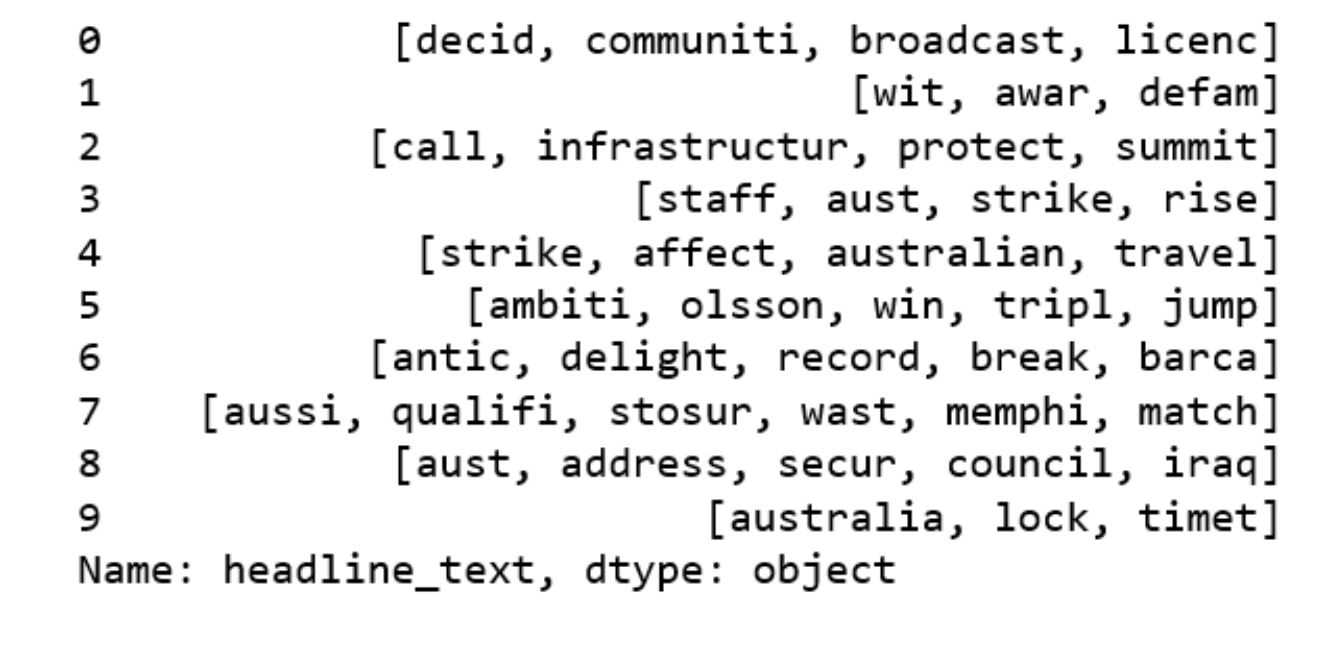

#### Data preprocessing

You begin by tokenizing the text data into words. Tokenizers divide strings into lists of substrings. The standard `nltk` word tokenizer can be used to find the words and punctuation in a string. It splits the words on, for example, white space, and separates the punctuations out. 

You then use `rstrip` to remove all the whitespaces from the beginning and end of the strings, and, finally, you make sure all text is lower case, by replacing all letters with their lowercase counterpart, using `regular expressions`. 

You then clean the text further by removing stopwords and punctuation. You can use the tokenized text and get rid of all punctuation. Nltk has a stopwords list for the English language that you can use. Since every row consists of a list of strings, you need to create small loops that select the words you want to keep. I use join here to separate the words I want to keep with a space.

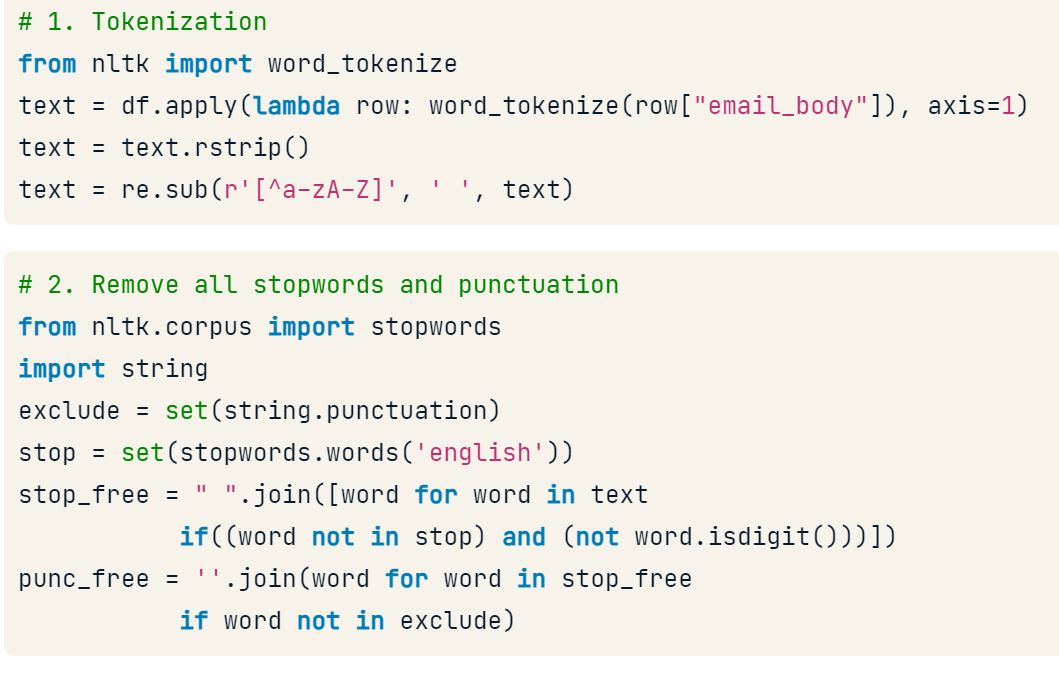

The next step is to **lemmatize** the words, this can be easily done with the nltk `WordNetLemmatizer`. Again, I loop over the words and make sure they are joined together with a space between them. Stemming your verbs is equally simple, you can use the nltk `PorterStemmer` for this. After this work your text data should be nice and clean. It consists of lists of cleaned words for each row in your dataframe.

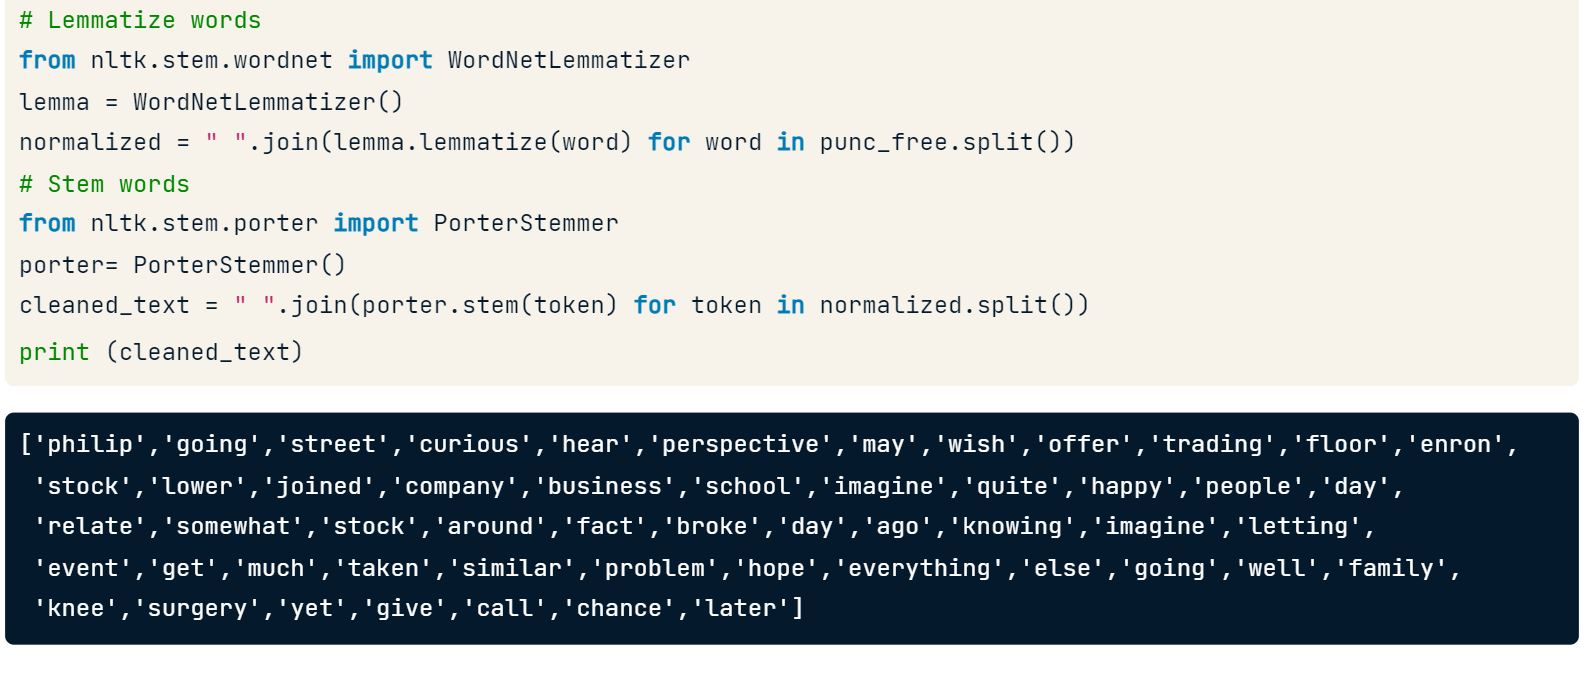


### 4.2.1 Removing stopwords

In [94]:
df = pd.read_csv('data/text.csv')
df

clean_content
0  enrolled following class electric business und...
1  start date hourahead hour ancillary schedules ...
2  information contained herein based sources bel...
3  list looks complete walt zimmerman eott com pm...
4  reid spice hayes st san francisco ca reidspice...

In the following exercises we will clean the Enron emails, in order to be able to use the data in a topic model. Text cleaning can be challenging, so we'll learn some steps to do this well. 

In [95]:
# Import nltk packages and string
nltk.download('omw-1.4')
import nltk
from nltk.corpus import stopwords
import string

# Define stopwords to exclude
stop = set(stopwords.words('english'))
stop.update(("to","cc","subject","http","from","sent", "ect", "u", "fwd", "www", "com"))

# Define punctuations to exclude and lemmatizer
exclude = set(string.punctuation)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/stephen137/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [96]:
# Import the lemmatizer from nltk
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

# Define word cleaning function
def clean(text, stop):
    text = text.rstrip()
    stop_free = " ".join([i for i in text.lower().split() if((i not in stop) and (not i.isdigit()))])
    punc_free = ''.join(i for i in stop_free if i not in exclude)
    normalized = " ".join(lemma.lemmatize(i) for i in punc_free.split())      
    return normalized

# Clean the emails in df and print results
text_clean=[]
for text in df['clean_content']:
    text_clean.append(clean(text, stop).split())    
print(text_clean)

[['enrolled', 'following', 'class', 'electric', 'business', 'understanding', 'class', 'day', 'time', 'pm', 'room', 'location', 'eb', 'houston', 'last', 'day', 'cancel', 'participant', 'fee', 'note', 'please', 'review', 'prerequisite', 'material', 'validate', 'eligibility', 'class', 'company', 'rc', 'charged', 'question', 'please', 'call', 'development', 'center', 'team', 'thank'], ['start', 'date', 'hourahead', 'hour', 'ancillary', 'schedule', 'awarded', 'variance', 'detected', 'log', 'message', 'parsing', 'file', 'portland', 'westdesk', 'california', 'scheduling', 'iso', 'final', 'schedule', 'txt', 'error', 'invalid', 'variant', 'type', 'conversion', 'energy', 'import', 'export', 'schedule', 'final', 'schedule', 'found', 'preferred', 'schedule', 'detail', 'trans', 'type', 'final', 'sc', 'id', 'ectstca', 'mkt', 'type', 'trans', 'date', 'tie', 'point', 'pverde', 'devers', 'interchg', 'id', 'epmi', 'ciso', 'engy', 'type', 'firm'], ['information', 'contained', 'herein', 'based', 'source',

 Now that you have cleaned your data entirely with the necessary steps, including splitting the text into words, removing stopwords and punctuations, and lemmatizing your words. You are now ready to run a topic model on this data

### 4.3 Topic modeling on fraud

#### Topic modeling: discover hidden patterns in text data

Topic modeling can be a powerful tool when searching for fraud in text data. Topic modeling allows you to discover abstract topics that occur in a collection of documents. Intuitively, given that a document is about a particular topic, one would expect particular words to appear in the document more or less frequently. Topic modeling, therefore, tells us in a very efficient way what the text is about, based on the words it contains. Conceptually, it is similar to clustering, as it clusters words belonging to the same topic together. If you have text data of known fraud cases, it allows you to check what are the most common topics for those fraud cases, and use that to compare unknown cases. Without known labels, you can inspect which topics seem to point to fraudulent behavior and are interesting to further investigate.

#### Latent Dirichlet Allocation (LDA)

Latent Dirichlet Allocation, or LDA, is an example of topic model and is commonly used. It creates a "topic per text item" model and "words per topic" model, which are called Dirichlet distributions. Implementation of LDA is straightforward :

- clean your data as described in the previous section. This is the most work. 
- create a dictionary containing which words appear how often in all of the text
- create a corpus, containing, for each text line in your data, the count of words that appear

The results you get from this model are twofold. 

1. you see how each word in your total data is associated with each topic.
2. you can also see how each text item in your data associates with topics, also in the form of probabilities. 

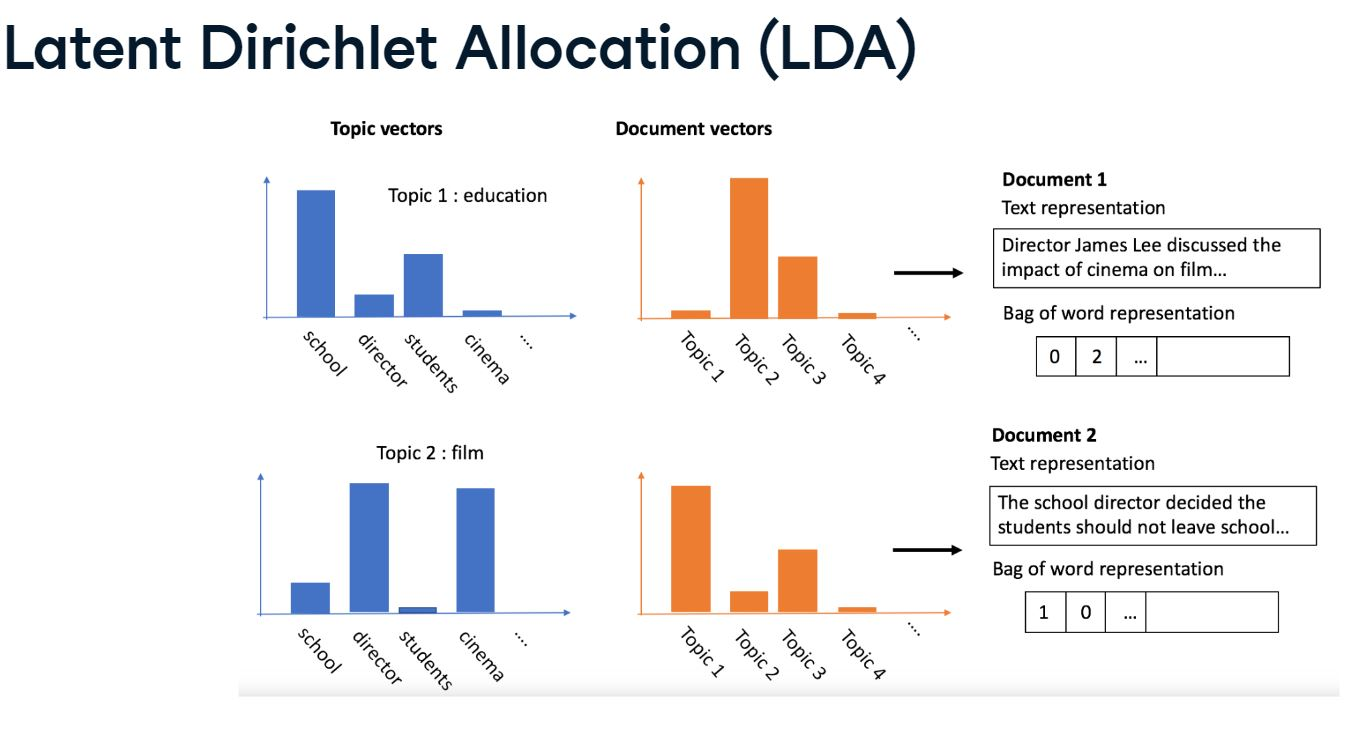


You can see this in the image here on the right. This image comes from a [blogpost on DataCamp about LDA](https://www.datacamp.com/tutorial/lda2vec-topic-model), which I encourage you to read if you want to learn more in detail.


#### Bag of words: dictionary and corpus

Let's talk about the implementation of an LDA model. You start by importing the corpora function from gensim.

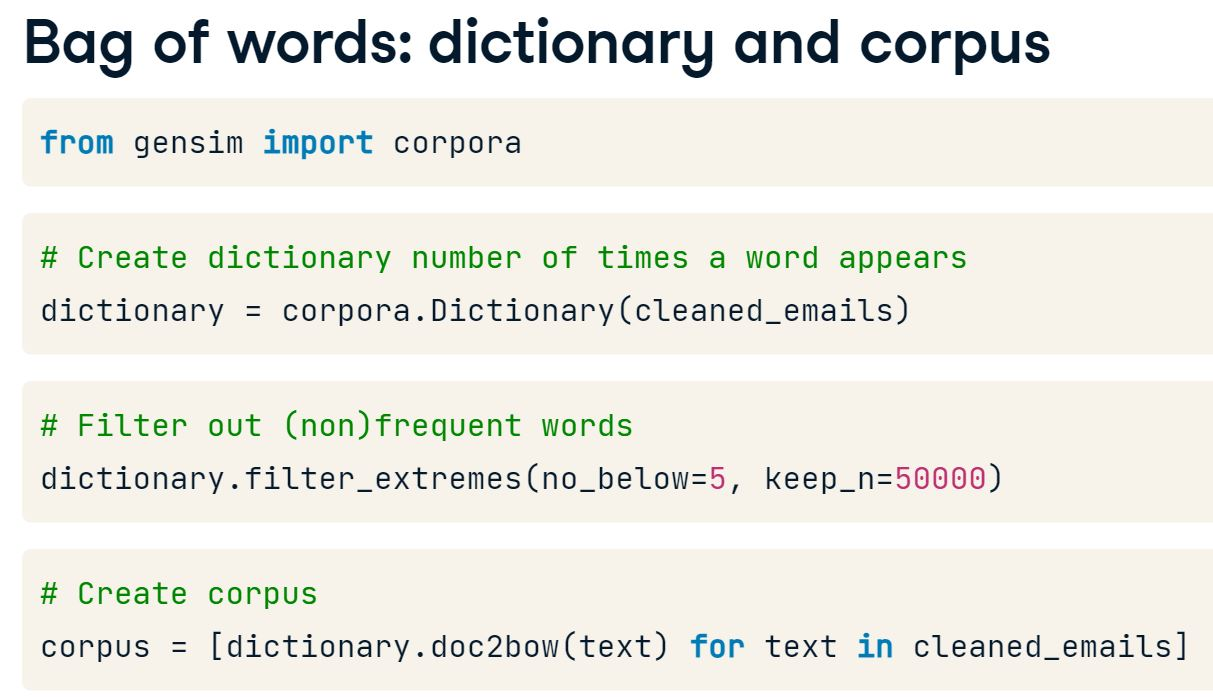

I use the dictionary function in corpora to create a dictionary from our text data, in this case, from the cleaned emails. The dictionary contains the number of times a word appears for each word. You then filter out words that appear in less than 5 emails and keep only the 50000 most frequent words, in a way of cleaning out the outlier noise of the text data. Last, you create a corpus that tells you, for each email, how many words it contains and how many times those words appear. You can use the doc2bow function for this. Doc2bow stands for document to bag of words. This function converts our text data into a bag-of-words format. That means, each row in our data is now a list of words with their associated word count.

#### Latent Dirichlet Allocation (LDA) with gensim

After cleaning the text data, and creating dictionary and corpus, you are now ready to run your LDA model. I use gensim again for this. 

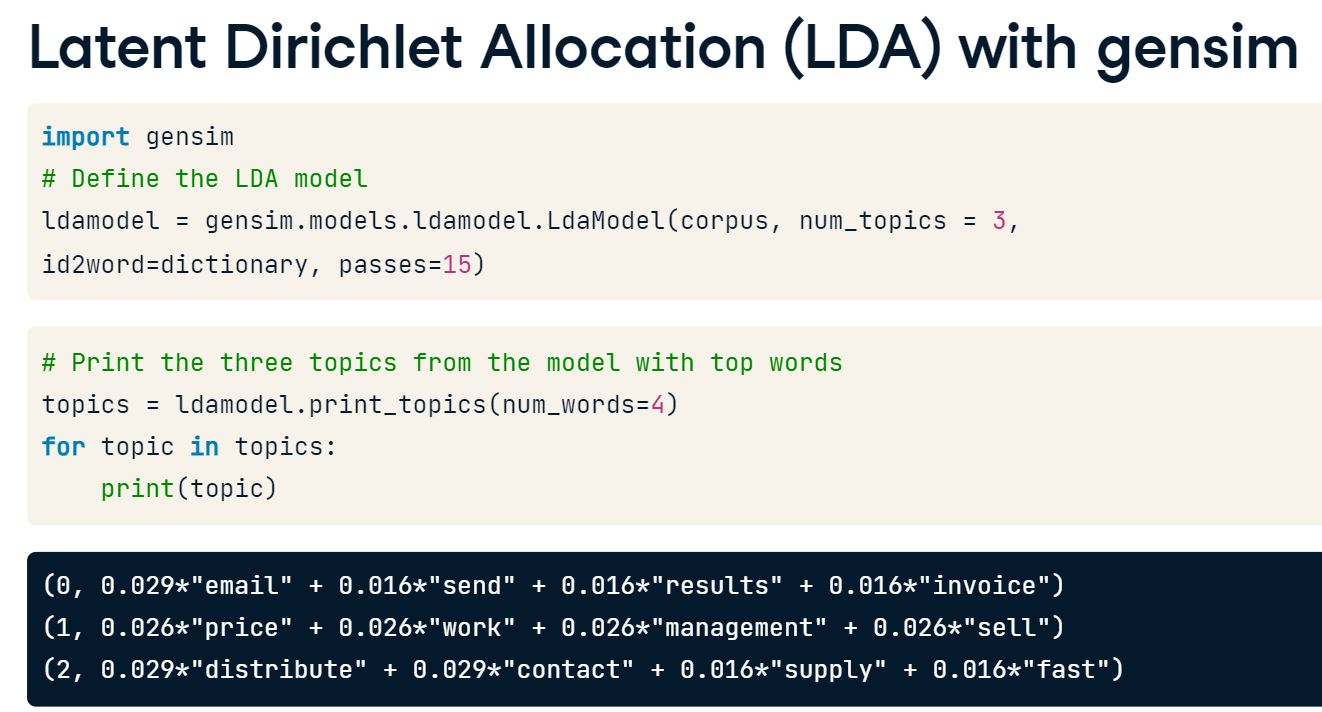

You need to pass the corpus and dictionary into the LDA model. As with K-means, you need to pick the number of topics you want beforehand, even if you're not sure yet what the topics are. The LDA model calculated here, now contains the associated words for each topic, and the topic scores per email. You can obtain the top words from the three topics with the function print_topics. As you can see, after running the model, I print the three topics and the four top keywords associated with the topic, for a first interpretation of the results.

### 4.3.1 Create dictionary and corpus

In order to run an LDA topic model, we first need to define our dictionary and corpus first, as those need to go into the model. We will continue working on the cleaned text data from the previous section.

In [97]:
# Import the packages
import gensim
from gensim import corpora

# Define the dictionary
dictionary = corpora.Dictionary(text_clean)

# Define the corpus 
corpus = [dictionary.doc2bow(text) for text in text_clean]

In [98]:
# Print corpus and dictionary
print(dictionary)

Dictionary<289 unique tokens: ['business', 'call', 'cancel', 'center', 'charged']...>


In [99]:
# Print corpus and dictionary
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)], [(33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 3), (50, 1), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 5), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 4), (75, 1), (76, 1), (77, 1)], [(18, 1), (21, 1), (43, 13), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 13), (90, 3), (91, 2), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 3), (98, 2), (99, 4), (100, 1), (101, 1), (102, 1), (103, 3), (104, 1), (105, 2), (106, 6), (107,

These are the two ingredients we need to run our topic model on the enron emails. We are now ready to create our fraud detection topic model.

### 4.3.2 LDA model

Now it's time to build the LDA model. Using the dictionary and corpus, we are ready to discover which topics are present in the Enron emails. With a quick print of words assigned to the topics, we can do a first exploration about whether there are any obvious topics that jump out. Be mindful that the topic model is heavy to calculate so it will take a while to run. Let's give it a try!

In [100]:
# Define the LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)

# Save the topics and top 5 words
topics = ldamodel.print_topics(num_words=5)

# Print the results
for topic in topics:
    print(topic)

(0, '0.040*"enron" + 0.029*"employee" + 0.023*"company" + 0.023*"million" + 0.018*"energy"')
(1, '0.042*"schedule" + 0.034*"type" + 0.026*"final" + 0.018*"id" + 0.018*"trans"')
(2, '0.006*"eott" + 0.004*"slate" + 0.004*"energy" + 0.004*"schedule" + 0.004*"company"')
(3, '0.051*"eott" + 0.018*"please" + 0.018*"class" + 0.018*"officer" + 0.018*"zimmerman"')
(4, '0.055*"research" + 0.055*"carrfut" + 0.055*"energy" + 0.055*"pdf" + 0.034*"spread"')


We have now successfully created a topic model on the Enron email data. However, the print of words doesn't really give us enough information to find a topic that might lead us to signs of fraud. We need to closely inspect the model results in order to be able to detect anything that can be related to fraud in our data.

### 4.4 Flagging fraud based on topics

#### Using our LDA model results for fraud detection

If you don't have labels, you can first of all check for frequency of suspicious words within topics, and check whether topics seem to describe the fraudulent behavior. For the Enron email data, a suspicious topic would be one where employees are discussing stock bonuses, selling stock, the Enron stock price, and perhaps mentions of accounting or weak financials. 

Defining suspicious topics does require some pre-knowledge about the fraudulent behavior. If the fraudulent topic is noticeable, you can flag all instances that have a high probability for this topic. If you have previous cases of fraud, you could run a topic model on the fraud text only, as well as on the non-fraud text. Check whether the results are similar, ie whether the frequency of the topics are the same in fraud versus non-fraud. Lastly, you can check whether fraud cases have a higher probability score for certain topics. If so, you can run a topic model on new data and create a flag directly on the instances that score high on those topics.

#### To understand topics, you need to visualize

Interpretation of the abstract topics can sometimes be difficult, so you need good visualization tools to dive deeper and try to understand what the underlying topics mean. There is a visualization tool called `pyLDAvis` for gensim available, that does an excellent job. Be mindful though, this tool only works with Jupyter notebooks. Once you have created your model, you can create a detailed visualization in just two lines of code. 

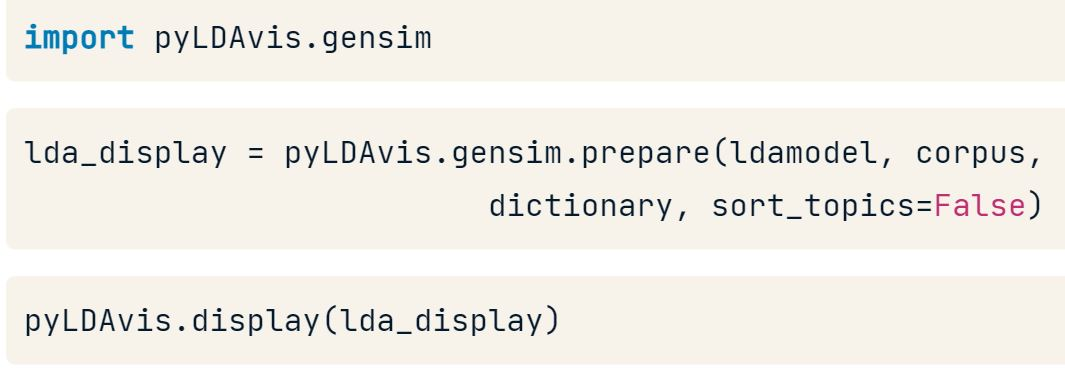

As you can see here, I input the model, the corpus, and the dictionary into the pyLDAvis library, and then simply display the results.

#### Inspecting how topics differ

The display looks like this and is interactive. 

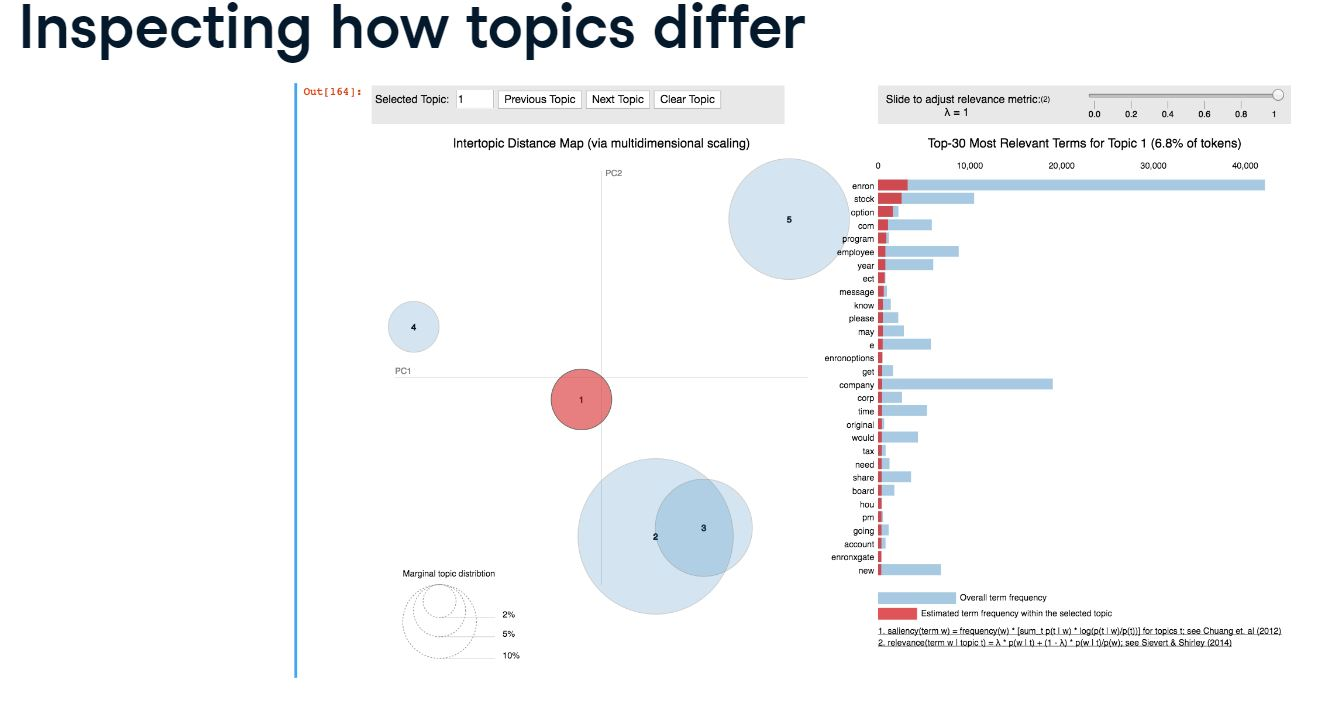

So how to interpret this output? Each bubble on the left-hand side represents a topic. The larger the bubble, the more prevalent that topic is. You can click on each topic to get the details per topic in the right panel. The words are the most important keywords that form the selected topic. A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart. A model with too many topics, will typically have many overlaps, or small sized bubbles, clustered in one region. In our case, there is a slight overlap between topic two and three, so that may point to one topic too many.

#### Assign topics to your original data

The function can be applied as follows. 

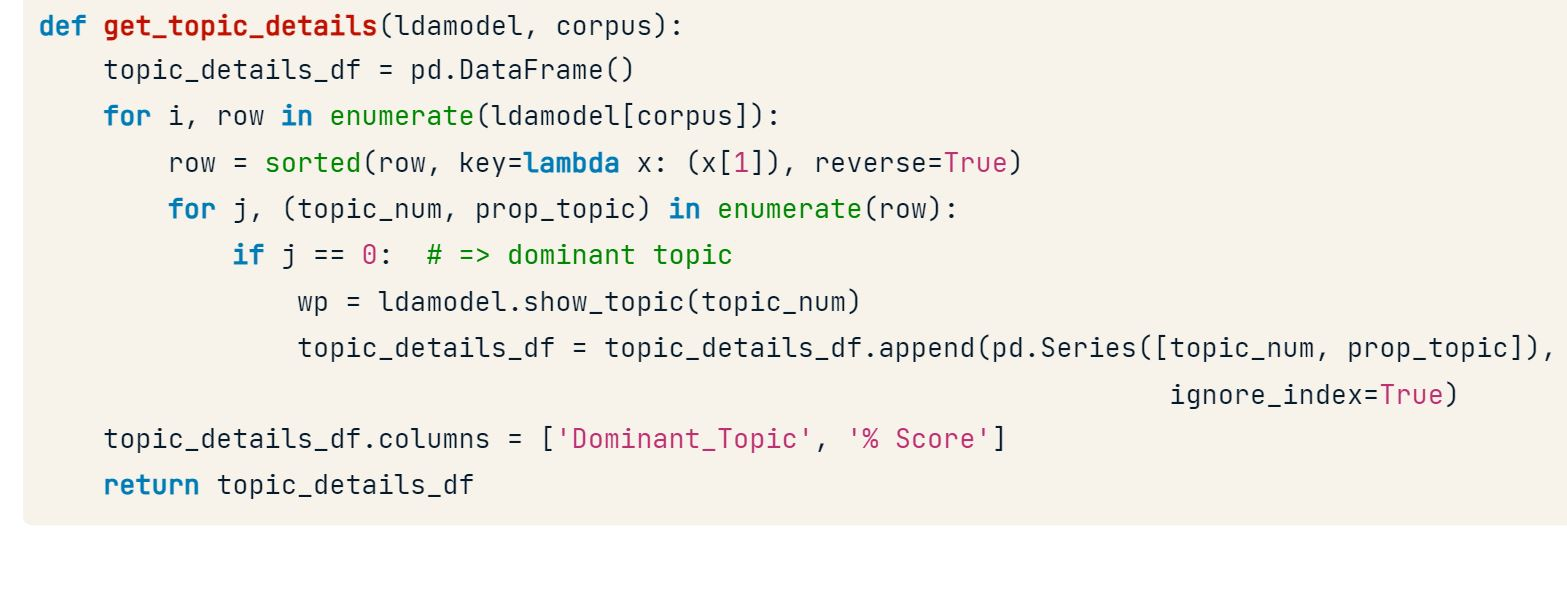

I take the original text data and combine that with the output of the get_topic_details function. The results looks like this. Each row contains the dominant topic number, the probability score with that topic, and the original text data.

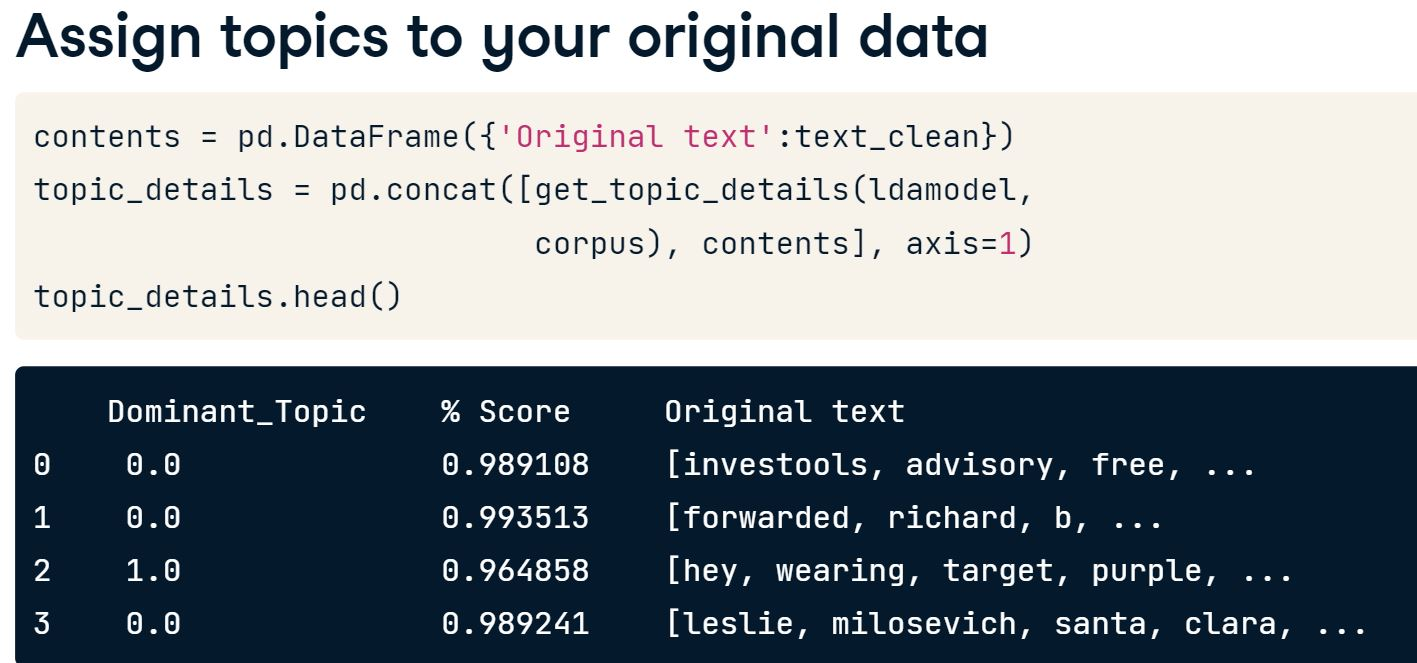

### 4.4.1 Finding fraudsters based on topic

Let's pull together the results from the topic model back to our original data. We learned that we want to flag everything related to topic 3. As we will see, this is actually not that straightforward. 

We will use a custom function `get_topic_details()` which takes the arguments ldamodel and corpus. It retrieves the details of the topics for each line of text. With that function, we can append the results back to our original data. If you want to learn more detail on how to work with the model results, you're highly encouraged to read [this article](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/).

In [108]:
def get_topic_details(ldamodel, corpus):
    topic_data = []  # Create a list to hold the data for each row
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topic_data.append([int(topic_num), round(prop_topic, 4), topic_keywords])

    # Create the DataFrame outside the loop
    topic_details_df = pd.DataFrame(topic_data, columns=['Dominant_Topic', '% Score', 'Topic_Keywords'])
    return topic_details_df

In [109]:
# Run get_topic_details function and check the results
print(get_topic_details(ldamodel, corpus))

   Dominant_Topic  % Score                                     Topic_Keywords
0               3   0.9789  eott, please, class, officer, zimmerman, w, sl...
1               1   0.9862  schedule, type, final, id, trans, date, energy...
2               4   0.9956  research, carrfut, energy, pdf, spread, gas, f...
3               3   0.9901  eott, please, class, officer, zimmerman, w, sl...
4               0   0.9934  enron, employee, company, million, energy, con...


In [110]:
# Add original text to topic details in a dataframe
contents = pd.DataFrame({'Original text': text_clean})
topic_details = pd.concat([get_topic_details(ldamodel, corpus), contents], axis=1)

In [111]:
# Create flag for text highest associated with topic 3
topic_details['flag'] = np.where((topic_details['Dominant_Topic'] == 3.0), 1, 0)
print(topic_details.head())

   Dominant_Topic  % Score                                     Topic_Keywords  \
0               3   0.9789  eott, please, class, officer, zimmerman, w, sl...   
1               1   0.9862  schedule, type, final, id, trans, date, energy...   
2               4   0.9956  research, carrfut, energy, pdf, spread, gas, f...   
3               3   0.9901  eott, please, class, officer, zimmerman, w, sl...   
4               0   0.9934  enron, employee, company, million, energy, con...   

                                       Original text  flag  
0  [enrolled, following, class, electric, busines...     1  
1  [start, date, hourahead, hour, ancillary, sche...     0  
2  [information, contained, herein, based, source...     0  
3  [list, look, complete, walt, zimmerman, eott, ...     1  
4  [reid, spice, hayes, st, san, francisco, ca, r...     0  


We have now flagged all data that is highest associated with topic 3, that seems to cover internal conversation about enron stock options. This project has demonstrated that text mining and topic modeling can be a powerful tool for fraud detection.

In [112]:
print(topic_details.iloc[0])

Dominant_Topic                                                    3
% Score                                                      0.9789
Topic_Keywords    eott, please, class, officer, zimmerman, w, sl...
Original text     [enrolled, following, class, electric, busines...
flag                                                              1
Name: 0, dtype: object


## Key Takeaways

### Working with imbalanced data

- learned how to rebalance data using resampling methods such as `Random Over and Under Sampling`, and the Synthetic Minority Oversample Technique, or `SMOTE`, to improve the perforamce of fraud detections models.

### Fraud detection with labeled data

- refreshed `supervised` learning techniques such as `random forests` 
- looked at `performance metrics`, such as the `confusion matrix`, and explored the importance of the `precision-recall` curve. 
- how to adjust the parameters of our machine learning models to improve fraud detection
- how to apply ensemble methods to combine multiple machine learning models to improve performance. 

In reality, truly reliable labels are often not available, so applying supervised learning is not always possible.

### Fraud detection without labels

- importance of segmentation to set a **baseline** for what is normal and not normal behavior in your fraud data. 
- `K-mean` clustering and the `elbow method` to apply clustering to fraud. 
- how to tag suspicious behavior by using outliers of the clusters, or the smallest clusters. 
- explored the `DBSCAN` clustering method for fraud, which has the benefit of not assigning cluster numbers beforehand. 

In reality, there are no easy ways to check validity of clustering models. It requires strong collaboration with the fraud analysts to sense check your results. The benefits of clustering for fraud detection is that your model adapts to the current data and is therefore dynamic. It doesn't rely on historically known fraud cases to learn from.

### Text mining for fraud detection

- how to leverage text data into your fraud analysis, by creating flags from word searches and topic models.
- how to properly clean text data, such that you can analyze it. 

In many cases of fraud detection you will have some sort of text data available, such as transaction descriptions, client emails, incident reports, etc. That makes text mining an important skill to have for fraud detection.

### Further learning for fraud detection

- `Network analysis` is an important tool not only to flag individuals committing fraud, but also to lay bare entire networks evolving around the same fraud case. 
- explore `neural networks` for fraud detection. Neural nets typically outperform other algorithms when data gets very large and complex, which can be the typical fraud data. 
- explore distributed computing systems such as `Spark` to boost your analysis.

Fraud data can be incredibly large, especially if you're working with money transactions, website traffic, or large amounts of text data. 


